In [1]:
import sys
sys.path

['C:\\Users\\20931\\Desktop',
 'E:\\My_Anaconda\\Anaconda\\python311.zip',
 'E:\\My_Anaconda\\Anaconda\\DLLs',
 'E:\\My_Anaconda\\Anaconda\\Lib',
 'E:\\My_Anaconda\\Anaconda',
 '',
 'E:\\My_Anaconda\\Anaconda\\Lib\\site-packages',
 'E:\\My_Anaconda\\Anaconda\\Lib\\site-packages\\win32',
 'E:\\My_Anaconda\\Anaconda\\Lib\\site-packages\\win32\\lib',
 'E:\\My_Anaconda\\Anaconda\\Lib\\site-packages\\Pythonwin']

In [18]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.providers.aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

# Import from Qiskit Aer noise module
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import thermal_relaxation_error
from qiskit.quantum_info import state_fidelity

C:\Users\20931\AppData\Local\Temp\ipykernel_22600\4127667587.py:43: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use assign_parameters() instead
  tc = tc.bind_parameters(dict(zip(params, param_values)))


Statevector([ 0.                +0.j                ,
             -0.                +0.j                ,
             -0.                +0.j                ,
             -0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
             -0.                +0.j                ,
             -0.7851501389543422+0.6193054652592509j,
             -0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
              0.            

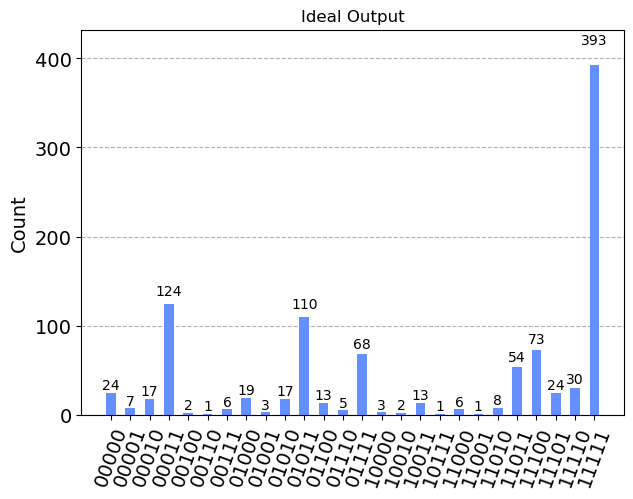

In [245]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.providers.aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

# Import from Qiskit Aer noise module
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import thermal_relaxation_error
from qiskit.quantum_info import state_fidelity

tc = qiskit.QuantumCircuit(5)
params = [qiskit.circuit.Parameter(f"θ{i}") for i in range(15)]
# print(params)
for i in range(5):
    tc.h(i)
    tc.rx(params[i], i)
for i in range(5):
    tc.rz(params[i+5], i)
tc.cx(0,1)
tc.cx(1,0)
tc.cx(2,3)
tc.cx(3,4)
tc.cx(4,2)

for i in range(5):
    tc.ry(params[i+10], i)
tc.measure_all()

# 理想模拟器和执行
sim_origin = AerSimulator()

# 为参数赋予随机值0--pi/2
param_values = np.random.rand(15) * np.pi/2
# param_values = np.full(15, np.pi/2)
# print(param_values)
# print(param_values)
# 构造具有指定参数值的量子电路
tc = tc.bind_parameters(dict(zip(params, param_values)))
# 创建用于添加噪声的理想电路副本
copied_tc = tc.copy()
# tc.draw('mpl')
tc.save_statevector() 

circ = transpile(tc, sim_origin)
# 运行电路并获取结果
result = sim_origin.run(circ).result()

ideal_statevector = result.get_statevector(circ)
print(ideal_statevector)
# 绘制测量结果直方图
plot_histogram(result.get_counts(0),title='Ideal Output')

E:\My_Anaconda\Anaconda\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


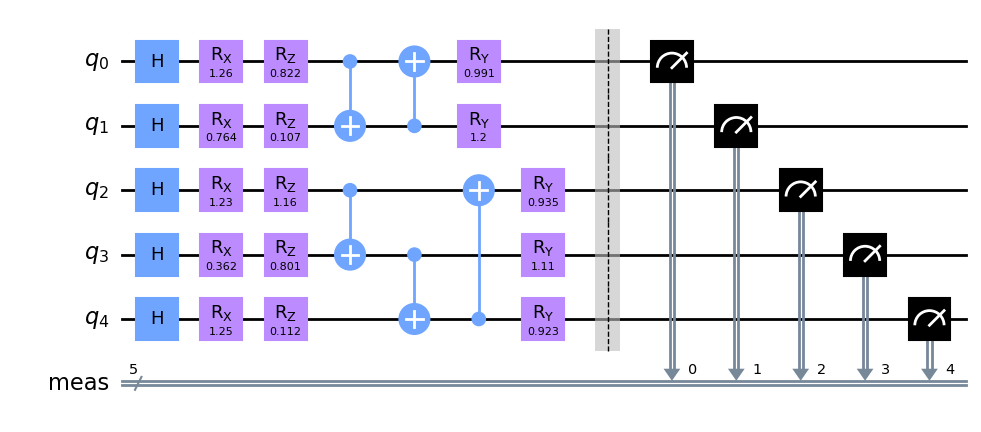

In [246]:
copied_tc.draw('mpl')

Statevector([ 0.                 +0.j                ,
              0.                 +0.j                ,
              0.                 +0.j                ,
              0.                 +0.j                ,
              0.                 +0.j                ,
              0.                 +0.j                ,
              0.                 +0.j                ,
              0.                 +0.j                ,
              0.                 +0.j                ,
              0.                 +0.j                ,
              0.                 +0.j                ,
              0.46578253989040697-0.8848992177266524j,
              0.                 +0.j                ,
              0.                 +0.j                ,
              0.                 +0.j                ,
              0.                 +0.j                ,
              0.                 +0.j                ,
             -0.                 +0.j                ,
          

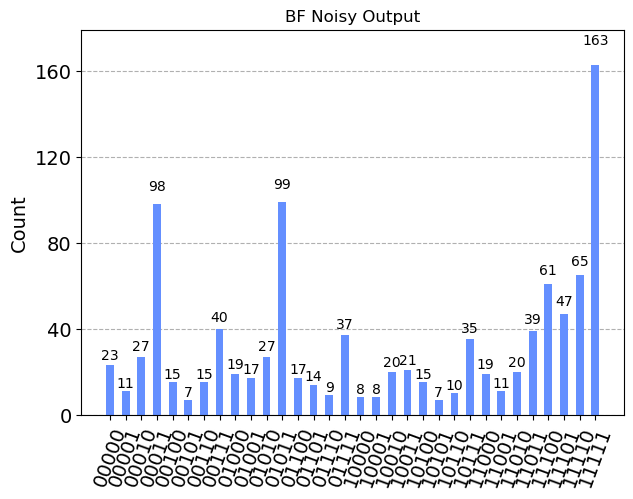

In [280]:
# bit flip
# Create a noise model
bf_noise_model = NoiseModel()

# Add bit flip error to single-qubit gates with probability 0.1, qiskit.quantum_info.Pauli
bf_noise_model.add_all_qubit_quantum_error(
    pauli_error([("X", 0.1),('I',1-0.1)]), ["rx", "rz", "ry"])

# Apply the noise model to the circuit
# Create noisy simulator and transpile circuit
sim_noise = AerSimulator(noise_model=bf_noise_model)
bf_circ_noise = transpile(copied_tc, sim_noise)
bf_circ_noise.save_statevector()
# Run on the simulator without noise
bf_noise_result = sim_noise.run(bf_circ_noise).result()
bf_noise_statevector = bf_noise_result.get_statevector()
print(bf_noise_statevector)
bf_noise_counts = bf_noise_result.get_counts()
plot_histogram(bf_noise_counts,
               title='BF Noisy Output')

In [281]:
bf_fidelity = state_fidelity(bf_noise_statevector,ideal_statevector)
bf_fidelity

0.9999999999999998

Statevector([ 0.                +0.j                ,
             -0.                +0.j                ,
             -0.                +0.j                ,
             -0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
             -0.                +0.j                ,
             -0.                +0.j                ,
             -0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
              0.                -0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
              0.            

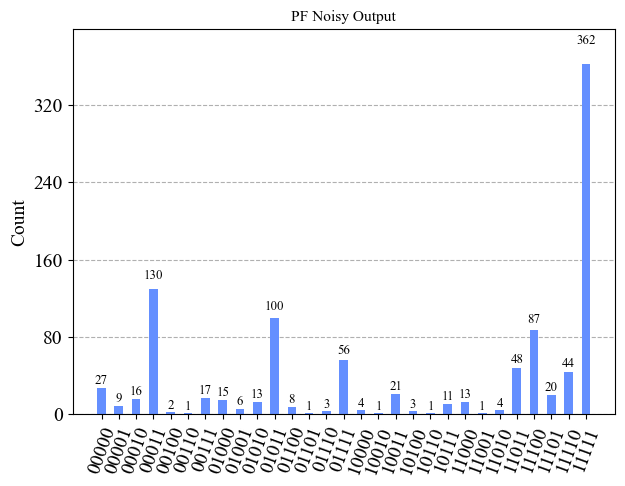

In [350]:
# 添加phase flip噪声
phase_flip_prob = 0.01  
pf_noise_copy = tc.copy()

# Create the noise model
pf_noise_model = NoiseModel()
pf_noise_model.add_all_qubit_quantum_error(pauli_error([('Z', phase_flip_prob), ('I', 1 - phase_flip_prob)]), ["rx","ry","rz"])
# Define phase flip error probability

# Run the circuit with noise
sim_pf_noise = AerSimulator(noise_model=pf_noise_model)
pf_circ_noise = transpile(copied_tc, sim_pf_noise)
pf_circ_noise.save_statevector()
# Run on the simulator without noise
pf_noise_result = sim_pf_noise.run(pf_circ_noise).result()

pf_noise_statevector = pf_noise_result.get_statevector()
print(pf_noise_statevector)
pf_noise_counts = pf_noise_result.get_counts()
plot_histogram(pf_noise_counts,
               title='PF Noisy Output')

In [301]:
pf_fidelity = state_fidelity(pf_noise_statevector,ideal_statevector)
pf_fidelity

1.0

Statevector([-0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
             -0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
              0.                +0.j                ,
             -0.                +0.j                ,
              0.            

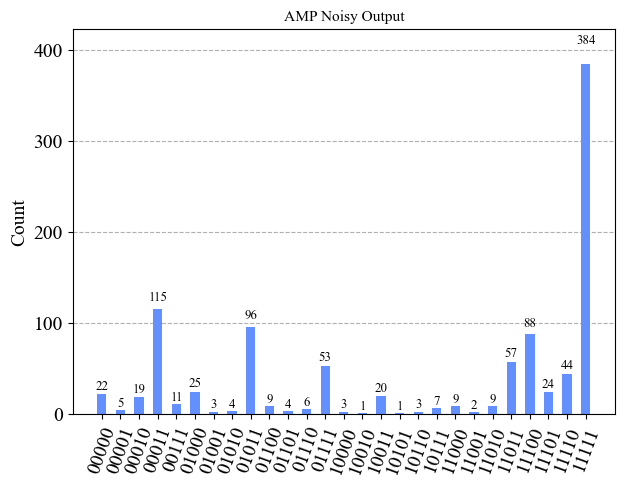

In [352]:
from qiskit.providers.aer.noise import amplitude_damping_error

# 添加Amplitude damping噪声
amp_flip_prob = 0.01  
pf_noise_copy = tc.copy()

# Create the noise model
amp_noise_model = NoiseModel()
amp_noise_model.add_all_qubit_quantum_error(amplitude_damping_error(amp_flip_prob),'ry')
# Define phase flip error probability

# Run the circuit with noise
sim_amp_noise = AerSimulator(noise_model=amp_noise_model)
amp_circ_noise = transpile(copied_tc, sim_amp_noise)
amp_circ_noise.save_statevector()
# Run on the simulator without noise
amp_noise_result = sim_amp_noise.run(amp_circ_noise).result()

amp_noise_statevector = amp_noise_result.get_statevector()
print(amp_noise_statevector)
amp_noise_counts = amp_noise_result.get_counts()
plot_histogram(amp_noise_counts,
               title='AMP Noisy Output')

In [324]:
amp_fidelity = state_fidelity(amp_noise_statevector,ideal_statevector)
amp_fidelity

1.0

Statevector([ 0.               +0.j               ,
             -0.               +0.j               ,
             -0.               +0.j               ,
             -0.               +0.j               ,
              0.               +0.j               ,
              0.               +0.j               ,
              0.               +0.j               ,
              0.               +0.j               ,
              0.               +0.j               ,
              0.               +0.j               ,
             -0.               +0.j               ,
             -0.               +0.j               ,
             -0.               +0.j               ,
              0.               +0.j               ,
              0.               +0.j               ,
              0.               +0.j               ,
              0.               +0.j               ,
              0.               +0.j               ,
              0.               +0.j               ,
            

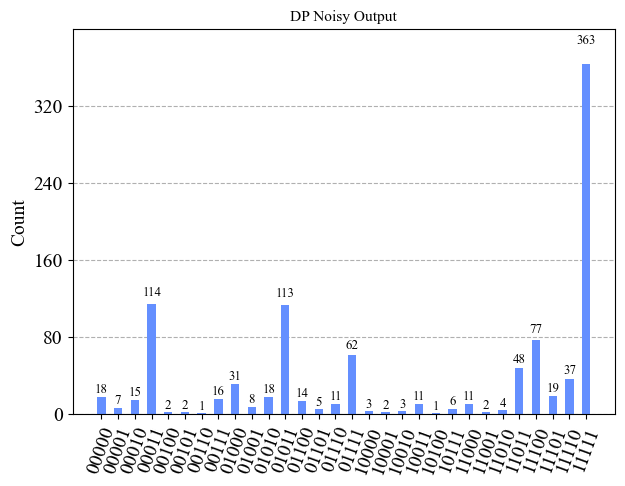

In [354]:
# 添加Depolarizing噪声
dp_prob = 0.01
dp_noise_copy = tc.copy()

# Create the noise model
dp_noise_model = NoiseModel()
dp_noise_model.add_all_qubit_quantum_error(depolarizing_error(dp_prob,1),['rx', 'rz', 'ry'])
# Define phase flip error probability

# Run the circuit with noise
sim_dp_noise = AerSimulator(noise_model=dp_noise_model)
dp_circ_noise = transpile(copied_tc, sim_dp_noise)
dp_circ_noise.save_statevector()
# Run on the simulator without noise
dp_noise_result = sim_dp_noise.run(dp_circ_noise).result()

dp_noise_statevector = dp_noise_result.get_statevector()
print(dp_noise_statevector)
dp_noise_counts = dp_noise_result.get_counts()
plot_histogram(dp_noise_counts,
               title='DP Noisy Output')

In [335]:
dp_fidelity = state_fidelity(dp_noise_statevector,ideal_statevector)
dp_fidelity

1.0000000000000004

E:\My_Anaconda\Anaconda\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


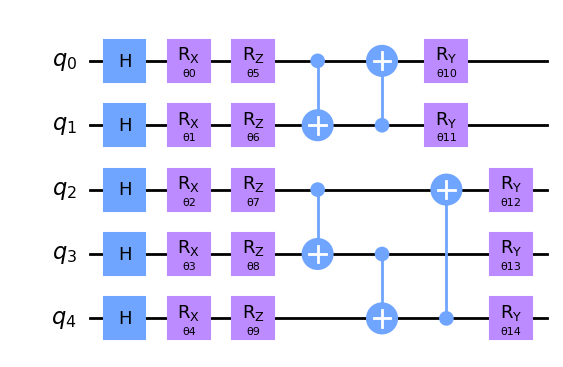

In [336]:
import numpy as np
import qiskit

tc = qiskit.QuantumCircuit(5)
params = [qiskit.circuit.Parameter(f"θ{i}") for i in range(15)]
# print(params)
for i in range(5):
    tc.h(i)
    tc.rx(params[i], i)
for i in range(5):
    tc.rz(params[i+5], i)
tc.cx(0,1)
tc.cx(1,0)
tc.cx(2,3)
tc.cx(3,4)
tc.cx(4,2)

for i in range(5):
    tc.ry(params[i+10], i)
tc.draw('mpl')

In [337]:
import typing
from qiskit.quantum_info import state_fidelity
import numpy as np
import sympy

import cirq
import qiskit
import pyquil

from cirq.contrib.qasm_import import circuit_from_qasm
from cirq.contrib.quil_import import circuit_from_quil
import qiskit.quantum_info
import pyquil.paulis

class CircuitDescriptor:
    """The interface for users to provide a circuit in any framework and visualize it in qLEET.

    It consists of 3 parts:
    * Circuit: which has the full ansatz preparation from the start where
    * Params: list of parameters which are used to parameterize the circuit
    * Cost Function: presently a pauli string, which we measure to get the
        output we are optimizing over

    Combined they form the full the parameterized quantum circuit from the initial qubits to the end
    measurement.
    """

    def __init__(
        self,
        circuit: typing.Union[qiskit.QuantumCircuit, cirq.Circuit, pyquil.Program],
        params: typing.List[typing.Union[sympy.Symbol, qiskit.circuit.Parameter]],
        cost_function: typing.Union[
            cirq.PauliSum, qiskit.quantum_info.PauliList, pyquil.paulis.PauliSum, None
        ] = None,
    ):
        """Constructor for the CircuitDescriptor

        :type circuit: Circuit in any supported library
        :param circuit: The full circuit which generates the required quantum state
        :type params: list[sympy.Symbol]
        :param params: The list of parameters to optimize over
        :type cost_function: PauliSum in any supported library
        :param cost_function: The measurement operation as a PauliString

        If you are not providing the full list of parameters of the circuit because
        you don't want to optimize over some of those parameters, because use a
        Parameter Resolver to resolve those parameter values before you pass in the
        lists. The list of parameters passed in here ought to be complete.
        """
        self._circuit = circuit
        self._params = params
        self._cost = cost_function

    @property
    def default_backend(self) -> str:
        """Returns the backend in which the user had provided the circuit.
        :returns: The name of the default backend
        :rtype: str
        :raises ValueError: if the given circuit is not from a supported library
        """
        if isinstance(self._circuit, cirq.Circuit):
            return "cirq"
        if isinstance(self._circuit, qiskit.QuantumCircuit):
            return "qiskit"
        if isinstance(self._circuit, pyquil.Program):
            return "pyquil"
        raise ValueError("Unsupported framework of circuit")

    @classmethod
    def from_qasm(
        cls,
        qasm_str: str,
        params: typing.List[typing.Union[sympy.Symbol, qiskit.circuit.Parameter]],
        cost_function: typing.Union[
            cirq.PauliSum, qiskit.quantum_info.PauliList, pyquil.paulis.PauliSum, None
        ],
        backend: str = "cirq",
    ):
        """Generate the descriptor from OpenQASM string

        :type qasm_str: str
        :param qasm_str: OpenQASM string for each part of the circuit
        :type params: list[sympy.Symbol]
        :param params: list of sympy symbols which act as parameters for the PQC
        :type cost_function: PauliSum
        :param cost_function: pauli-string operator to implement cost function
        :type backend: str
        :param backend: backend for the circuit descriptor objects
        :return: The CircuitDescriptor object
        :rtype: CircuitDescriptor
        """
        if backend == "cirq":
            circuit = circuit_from_qasm(qasm_str)
        elif backend == "qiskit":
            circuit = qiskit.QuantumCircuit.from_qasm_str(qasm_str)
        elif backend == "pyquil":
            circuit = pyquil.Program(circuit_from_qasm(qasm_str).to_quil())

        return CircuitDescriptor(
            circuit=circuit, params=params, cost_function=cost_function
        )

    @property
    def parameters(
        self,
    ) -> typing.List[typing.Union[sympy.Symbol, qiskit.circuit.Parameter]]:
        """The list of sympy symbols to resolve as parameters, will be swept from 0 to 2*pi
        :return: list of parameters
        """
        return self._params

    def __len__(self) -> int:
        """Number of parameters in the variational circuit
        :return: number of parameters in the circuit
        """
        return len(self.parameters)

    @property
    def cirq_circuit(self) -> cirq.Circuit:
        """Get the circuit in cirq
        :return: the cirq representation of the circuit
        :rtype: cirq.Circuit
        """
        return convert_to_cirq(self._circuit)

    @property
    def qiskit_circuit(self) -> qiskit.QuantumCircuit:
        """Get the circuit in qiskit
        :return: the qiskit representation of the circuit
        :rtype: qiskit.QuantumCircuit
        """
        return convert_to_qiskit(self._circuit)

    @property
    def pyquil_circuit(self) -> pyquil.Program:
        """Get the circuit in pyquil
        :return: the pyquil representation of the circuit
        :rtype: pyquil.Program
        """
        return convert_to_pyquil(self._circuit)

    @property
    def num_qubits(self) -> int:
        """Get the number of qubits for a circuit
        :return: the number of qubits in the circuit
        :rtype: int
        :raises ValueError: if unsupported circuit framework is given
        """
        if isinstance(self._circuit, cirq.Circuit):
            return len(self._circuit.all_qubits())
        elif isinstance(self._circuit, qiskit.QuantumCircuit):
            return self._circuit.num_qubits
        elif isinstance(self._circuit, pyquil.Program):
            return len(self._circuit.get_qubits())
        else:
            raise ValueError("Unsupported framework of circuit")

    @property
    def cirq_cost(self) -> cirq.PauliSum:
        """Returns the cost function, which is a function that takes in the state vector or the
        density matrix and returns the loss value of the solution envisioned by the Quantum Circuit.
        :raises ValueError: if the circuit is not from one of the supported frameworks
        :raises NotImplementedError: Long as qiskit and pyquil ports of pauli-string aren't written
        :return: cost function
        TODO: Implement conversions into Cirq PauliSum
        """
        if isinstance(self._cost, cirq.PauliSum):
            return self._cost
        elif isinstance(self._cost, qiskit.quantum_info.PauliList):
            raise NotImplementedError("Qiskit PauliString support is not implemented")
        elif isinstance(self._cost, pyquil.paulis.PauliSum):
            raise NotImplementedError("PyQuil PauliString support is not implemented")
        else:
            raise ValueError("Cost object should be a Pauli-Sum object")

    def __eq__(self, other: typing.Any) -> bool:
        """Checks equality between a CircuitDescriptor and another object"""
        if isinstance(other, CircuitDescriptor):
            return (
                np.array_equal(self.parameters, other.parameters)
                and self.cirq_circuit == other.cirq_circuit
            )
        return False

    def __repr__(self) -> str:
        """Prints the representation of the CircuitDescriptor
        You can eval this to get the object back.

        :returns: The repr string
        :rtype: str
        """
        return f"qleet.CircuitDescriptor({repr(self._circuit)}, {repr(self._params)})"

    def __str__(self) -> str:
        """Prints the string form of the CircuitDescriptor

        :returns: The string form
        :rtype: str
        """
        return f"qleet.CircuitDescriptor({repr(self._circuit)})"

In [338]:
import itertools
import typing
from abc import abstractmethod, ABC
from scipy.spatial.distance import jensenshannon

class MetaExplorer(ABC):
    """Abstract class to represent interface of analyzing a the current state of the circuit.
    Treats the parameters of the circuit as a snapshot.
    """

    def __init__(self):
        """Constructs the Explorer object."""
        
from cirq.devices.noise_model import NoiseModel as cirqNoiseModel
# from qiskit.providers.aer.noise import NoiseModel as qiskitNoiseModel
from qiskit_aer.noise import NoiseModel as qiskitNoiseModel
from pyquil.noise import NoiseModel as pyquilNoiseModel

class Expressibility(MetaExplorer):
    """Calculates expressibility of a parameterized quantum circuit"""

    def __init__(
        self,
        circuit: CircuitDescriptor,
        noise_model: typing.Union[
            cirqNoiseModel, qiskitNoiseModel, pyquilNoiseModel, None
        ] = None,
        samples: int = 1000,
    ):
        """Constructor the the Expressibility analyzer

        :param circuit: input circuit as a CircuitDescriptor object
        :param noise_model:  (dict, NoiseModel) initialization noise-model dictionary
        :param samples: number of samples for the experiment
        :raises ValueError: If circuit and noise model does not correspond to same framework
        """
        super().__init__()
        self.circuit = circuit

        if noise_model is not None:
            if (
                (
                    circuit.default_backend == "cirq"
                    and isinstance(noise_model, cirqNoiseModel)
                )
                or (
                    circuit.default_backend == "qiskit"
                    and isinstance(noise_model, qiskitNoiseModel)
                )
                or (
                    circuit.default_backend == "pyquil"
                    and isinstance(noise_model, pyquilNoiseModel)
                )
            ):
                self.noise_model = noise_model
            else:
                raise ValueError(
                    f"Circuit and noise model must correspond to the same \
                    framework but circuit:{circuit.default_backend} and \
                    noise_model:{type(noise_model)} were provided."
                )
        else:
            self.noise_model = None

        self.num_samples = samples
        self.expr = 0.0
        self.plot_data: typing.List[np.ndarray] = []

    @staticmethod
    def kl_divergence(prob_a: np.ndarray, prob_b: np.ndarray) -> float:
        """Returns KL divergence between two probabilities"""
        prob_a[prob_a == 0] = 1e-10
        kl_div = np.sum(np.where(prob_a != 0, prob_a * np.log(prob_a / prob_b), 0))
        return typing.cast(float, kl_div)

    def gen_params(self) -> typing.Tuple[typing.List, typing.List]:
        """Generate parameters for the calculation of expressibility

        :returns theta (np.array): first list of parameters for the parameterized quantum circuit
        :returns phi (np.array): second list of parameters for the parameterized quantum circuit
        """
        theta = [
            {p: 2 * np.random.random() * np.pi for p in self.circuit.parameters}
            for _ in range(self.num_samples)
        ]
        phi = [
            {p: 2 * np.random.random() * np.pi for p in self.circuit.parameters}
            for _ in range(self.num_samples)
        ]
        return theta, phi

    def prob_haar(self) -> np.ndarray:
        """Returns probability density function of fidelities for Haar Random States"""
        fidelity = np.linspace(0, 1, self.num_samples)
        num_qubits = self.circuit.num_qubits
        return (2 ** num_qubits - 1) * (1 - fidelity + 1e-8) ** (2 ** num_qubits - 2)

    def prob_pqc(self, shots: int = 1024) -> np.ndarray:
        """Return probability density function of fidelities for PQC

        :param shots: number of shots for circuit execution
        :returns fidelities (np.array): np.array of fidelities
        """
        thetas, phis = self.gen_params()

        theta_circuits = [
            CircuitSimulator(self.circuit, self.noise_model).simulate(theta, shots)
            for theta in thetas
        ]
        phi_circuits = [
            CircuitSimulator(self.circuit, self.noise_model).simulate(phi, shots)
            for phi in phis
        ]
        fidelity = np.array(
            [
                state_fidelity(rho_a, rho_b)
                for rho_a, rho_b in itertools.product(theta_circuits, phi_circuits)
            ]
        )
        return np.array(fidelity)

    def expressibility(self, measure: str = "kld", shots: int = 1024) -> float:
        r"""Returns expressibility for the circuit

        .. math::
            Expr = D_{KL}(\hat{P}_{PQC}(F; \theta) | P_{Haar}(F))\\
            Expr = D_{\sqrt{JSD}}(\hat{P}_{PQC}(F; \theta) | P_{Haar}(F))

        :param measure: specification for the measure used in the expressibility calculation
        :param shots: number of shots for circuit execution
        :returns pqc_expressibility: float, expressibility value
        :raises ValueError: if invalid measure is specified
        """
        haar = self.prob_haar()
        haar_prob: np.ndarray = haar / float(haar.sum())

        if len(self.circuit.parameters) > 0:
            fidelity = self.prob_pqc(shots)
        else:
            fidelity = np.ones(self.num_samples ** 2)

        bin_edges: np.ndarray
        pqc_hist, bin_edges = np.histogram(
            fidelity, self.num_samples, range=(0, 1), density=True
        )
        pqc_prob: np.ndarray = pqc_hist / float(pqc_hist.sum())

        if measure == "kld":
            pqc_expressibility = self.kl_divergence(pqc_prob, haar_prob)
        elif measure == "jsd":
            pqc_expressibility = jensenshannon(pqc_prob, haar_prob, 2.0)
        else:
            raise ValueError("Invalid measure provided, choose from 'kld' or 'jsd'")
        self.plot_data = [haar_prob, pqc_prob, bin_edges]
        self.expr = pqc_expressibility

        return pqc_expressibility

    def plot(self, figsize=(6, 4), dpi=300, **kwargs):
        """Returns plot for expressibility visualization"""
        if not self.plot_data:
            raise ValueError("Perform expressibility calculation first")

        haar_prob, pqc_prob, bin_edges = self.plot_data
        expr = self.expr

        bin_middles = (bin_edges[1:] + bin_edges[:-1]) / 2.0
        bin_width = bin_edges[1] - bin_edges[0]

        fig = plt.figure(figsize=figsize, dpi=dpi, **kwargs)
        plt.bar(bin_middles, haar_prob, width=bin_width, label="Haar")
        plt.bar(bin_middles, pqc_prob, width=bin_width, label="PQC", alpha=0.6)
        plt.xlim((-0.05, 1.05))
        plt.ylim(bottom=0.0, top=max(max(pqc_prob), max(haar_prob)) + 0.01)
        plt.grid(True)
        plt.title(f"Expressibility: {np.round(expr,5)}")
        plt.xlabel("Fidelity")
        plt.ylabel("Probability")
        plt.legend()

        return fig

In [339]:
class CircuitSimulator:
    """The interface for users to execute their CircuitDescriptor objects"""

    def __init__(
        self,
        circuit: CircuitDescriptor,
        noise_model: typing.Union[
            cirqNoiseModel, qiskitNoiseModel, pyquilNoiseModel, None
        ] = None,
    ) -> None:
        """Initialize the state simulator
        :type circuit: CircuitDescriptor
        :param circuit: the target circuit to simulate
        :type noise_model: Noise model as a dict or in the library format
        :param noise_model: the noise model as dict or empty dict for density matrix simulations,
            None if performing state vector simulations
        """
        self.circuit = circuit
        self.noise_model = noise_model
        self._result = None

    @property
    def result(
        self,
    ) -> typing.Optional[np.ndarray]:
        """Get the results stored from the circuit simulator
        :return: stored result of the circuit simulation if it has been performed, else None.
        :rtype: np.array or None
        """
        return self._result

    def simulate(
        self,
        param_resolver: typing.Dict[qiskit.circuit.Parameter, float],
        shots: int = 1024,
    ) -> np.ndarray:
        """Simulate to get the state vector or the density matrix
        :type param_resolver: Dict to resolve all parameters to a static float value
        :param param_resolver: a dictionary of all the symbols/parameters mapping to their values
        :type shots: int
        :param shots: number of times to run the qiskit density matrix simulator
        :returns: state vector or density matrix resulting from the simulation
        :rtype: np.array
        :raises NotImplementedError: if circuit simulation is not supported for a backend
        """
        if self.circuit.default_backend == "qiskit":
            circuit = self.circuit.qiskit_circuit.bind_parameters(param_resolver)
            if self.noise_model is not None:
#                 circuit.snapshot("final", snapshot_type="density_matrix")
                circuit.save_density_matrix()
                result = qiskit.execute(
                    circuit,
                    qiskit.Aer.get_backend("qasm_simulator"),
                    shots=shots,
                    noise_model=self.noise_model,
                    backend_options={"method": "density_matrix"},
                ).result()
#                 result_data = result.data(0)["snapshots"]["density_matrix"]["final"][0][
#                     "value"
                result_data = result.data(0)[
                    "value"
                ]
            else:
                circuit.save_statevector()
#                 circuit.snapshot("final", snapshot_type="statevector")
                result = qiskit.execute(
                    circuit, qiskit.Aer.get_backend("aer_simulator_statevector")
                ).result()
#                 result_data = result.data(0)["snapshots"]["statevector"]["final"][0]
#                 print(result.data(0))
                result_data = result.data(0)["statevector"]


        elif self.circuit.default_backend == "cirq":

            circuit = self.circuit.cirq_circuit
            non_unitary_flag = False
            for op in circuit.all_operations():
                op_name = str(op).split("(")[0]
                if op_name in [
                    "phase_flip",
                    "phase_damp",
                    "amplitude_damp",
                    "depolarize",
                    "asymmetric_depolarize",
                ]:
                    non_unitary_flag = True
                    break

            if self.noise_model is None and not non_unitary_flag:
                simulator = cirq.Simulator()  # type: ignore
                result = simulator.simulate(self.circuit.cirq_circuit, param_resolver)
                result_data = result.final_state_vector
            else:
                simulator = cirq.DensityMatrixSimulator(noise=self.noise_model)  # type: ignore
                result = simulator.simulate(self.circuit.cirq_circuit, param_resolver)
                result_data = result.final_density_matrix

        else:
            raise NotImplementedError(
                "Parametrized circuit simulation is not implemented for this backend."
            )

        self._result = result_data
        return result_data

In [340]:
def convert_to_qiskit(
    circuit: typing.Union[qiskit.QuantumCircuit, cirq.Circuit, pyquil.Program]
) -> qiskit.QuantumCircuit:
    """Converts any circuit to qiskit
    :type circuit: Circuit in any supported library
    :param circuit: input circuit in any framework
    :raises ValueError: if the circuit is not from one of the supported frameworks
    :return: circuit in qiskit
    :rtype: qiskit.QuantumCircuit
    """
    if isinstance(circuit, cirq.Circuit):
        return qiskit.QuantumCircuit.from_qasm_str(circuit.to_qasm())
    elif isinstance(circuit, qiskit.QuantumCircuit):
        return circuit
    elif isinstance(circuit, pyquil.Program):
        return convert_to_qiskit(convert_to_cirq(circuit))
    else:
        raise ValueError(
            f"Expected a circuit object in cirq, qiskit or pyquil, got {type(circuit)}"
        )

In [341]:
qiskit_descriptor = CircuitDescriptor(
    circuit=tc, params=params, cost_function=None
)

qiskit_expressibility = Expressibility(  
    qiskit_descriptor, samples=1000
)

express_jsd = qiskit_expressibility.expressibility("jsd")
express_jsd

C:\Users\20931\AppData\Local\Temp\ipykernel_22600\2995150012.py:47: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use assign_parameters() instead
  circuit = self.circuit.qiskit_circuit.bind_parameters(param_resolver)
C:\Users\20931\AppData\Local\Temp\ipykernel_22600\2995150012.py:67: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  circuit, qiskit.Aer.get_backend("aer_simulator_statevector")
C:\Users\20931\AppData\Local\Temp\ipykernel_22600\2995150012.py:66: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run

0.2987755312637099

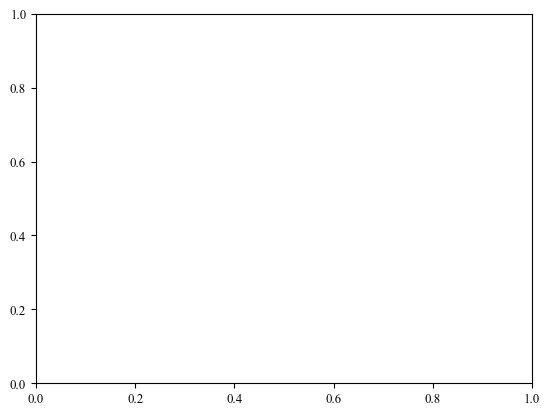

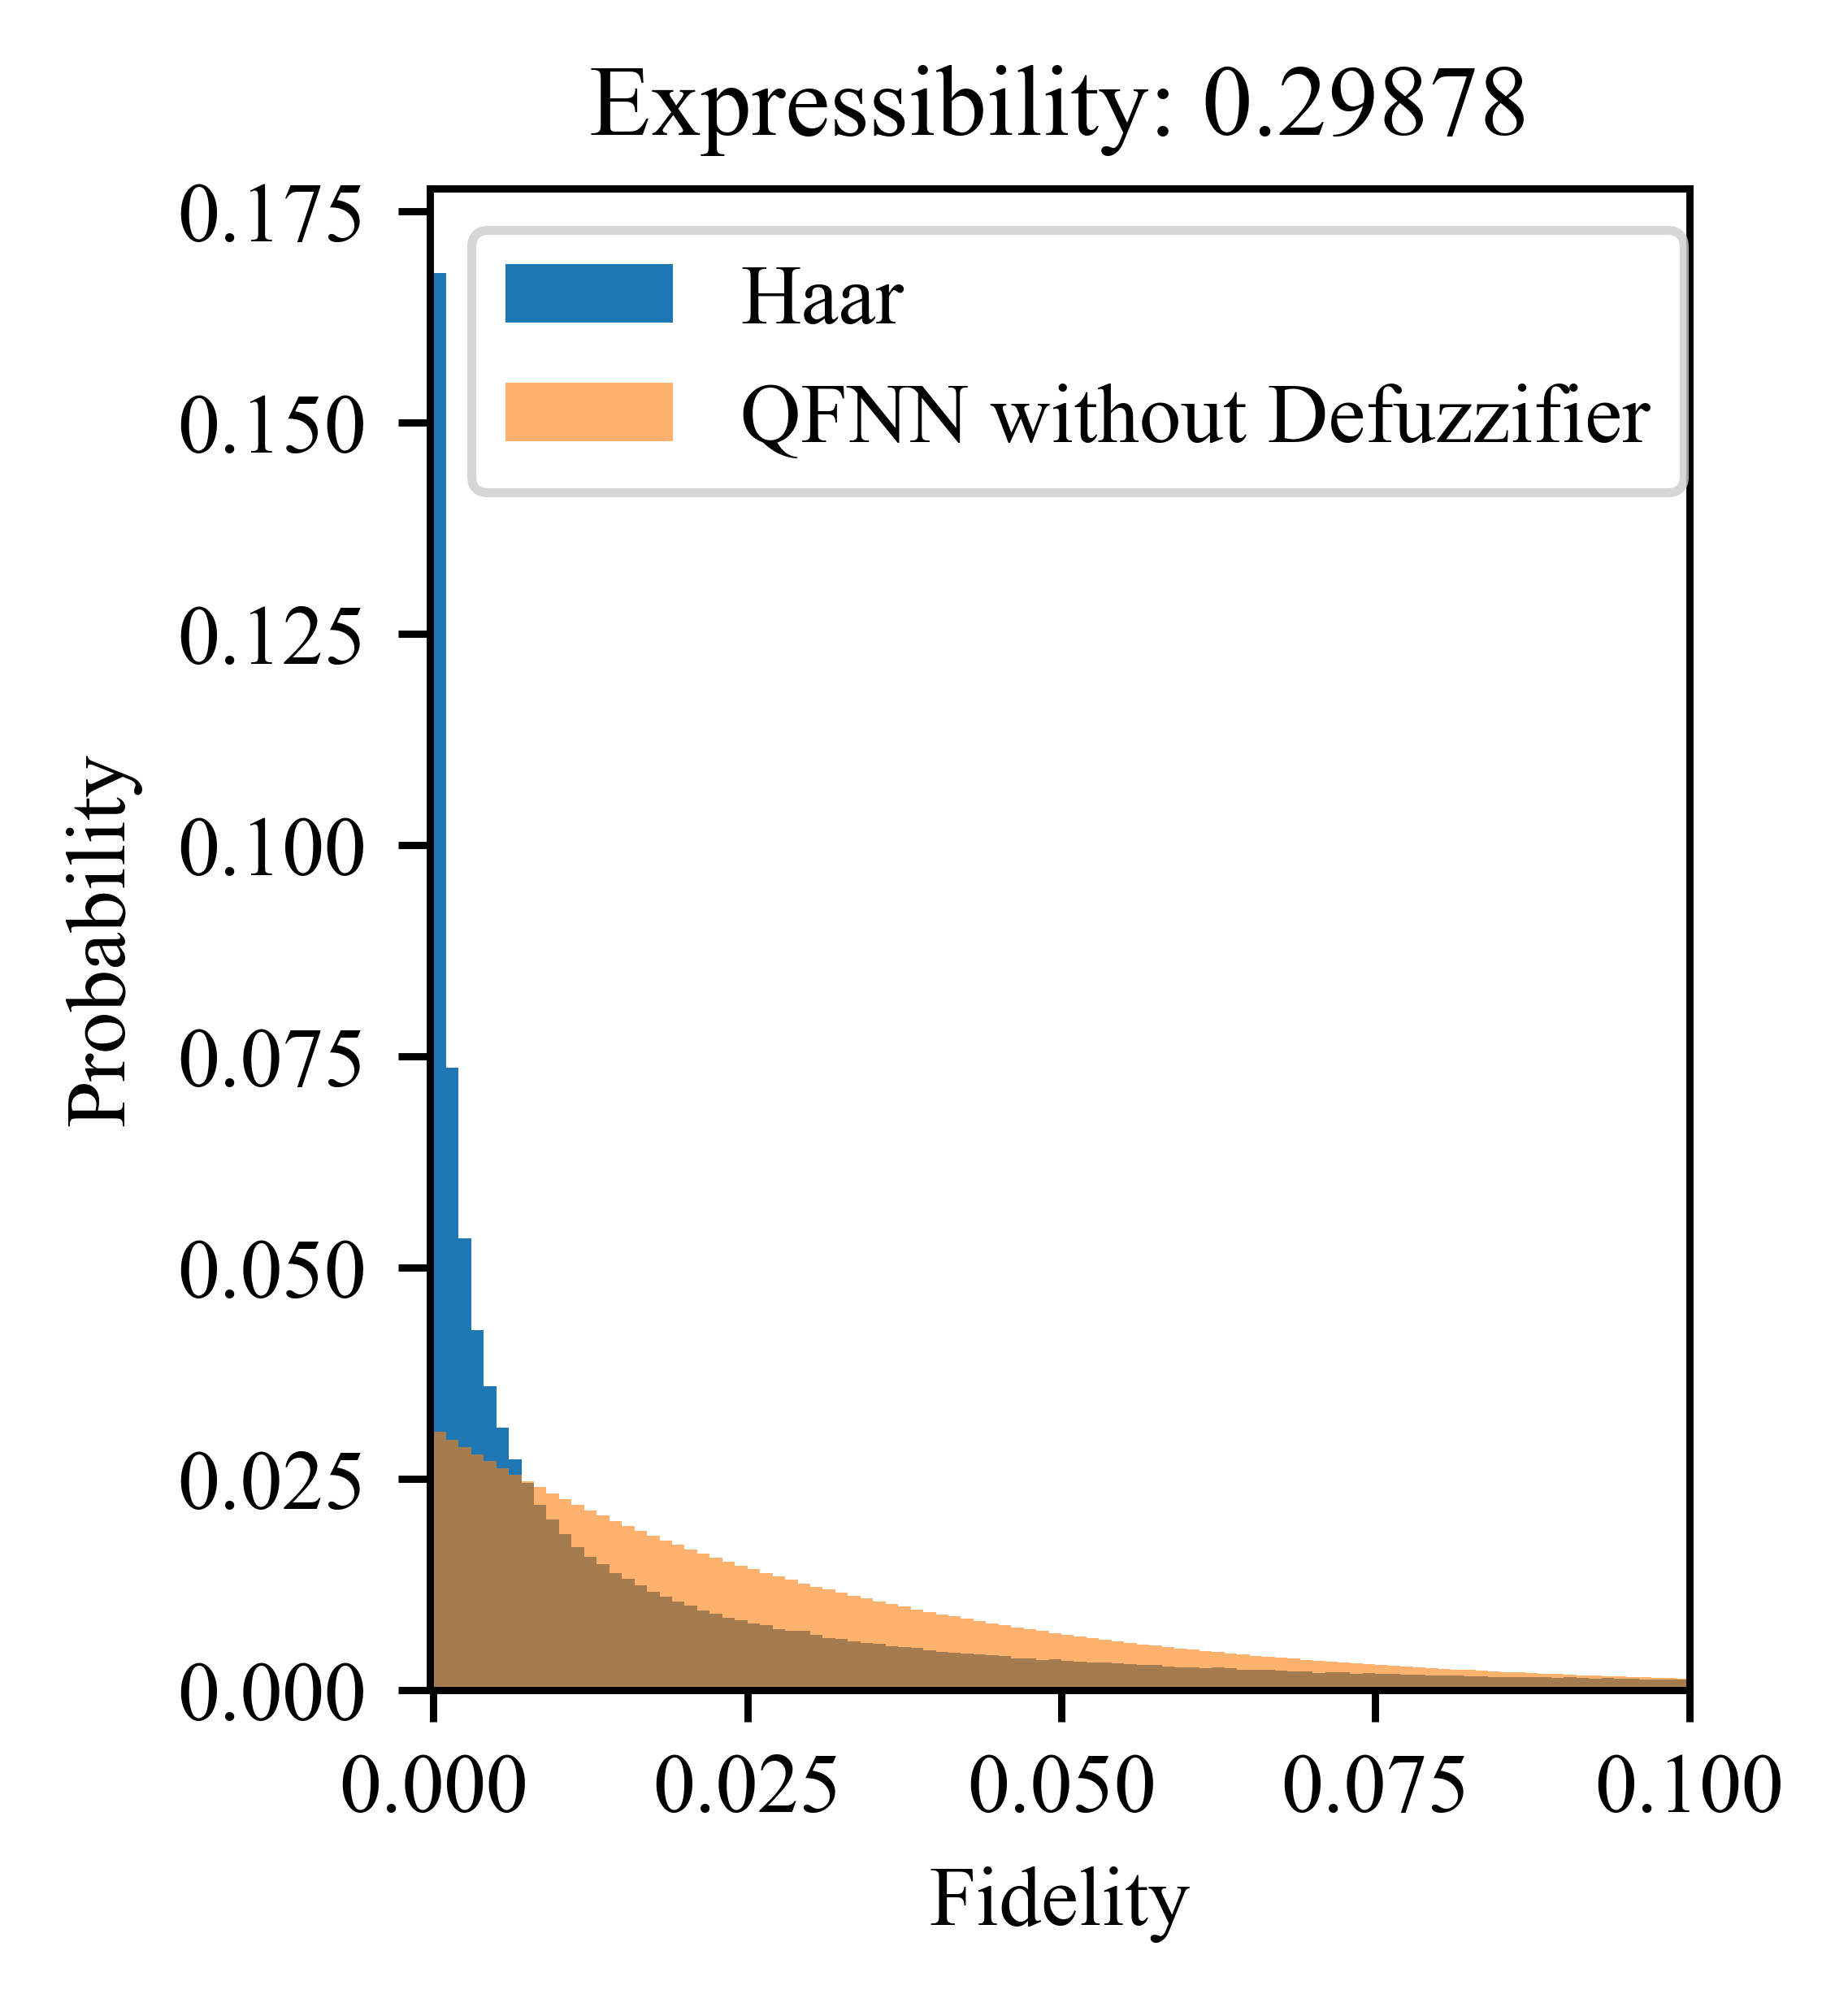

In [343]:
import numpy as np
pqc_prob_qcnn=qiskit_expressibility.plot_data[0][:250]
haar_prob=qiskit_expressibility.plot_data[1][:250]
bin_edges=qiskit_expressibility.plot_data[2][:251]

import matplotlib.pyplot as plt

plt.clf()

plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams['font.size'] = 9.3

plt.grid(False)

plt.figure(figsize=(2.5,3), dpi=800)

expr = express_jsd

bin_middles = (bin_edges[1:] + bin_edges[:-1]) / 2.0
bin_width = bin_edges[1] - bin_edges[0]
plt.bar(bin_middles, haar_prob, width=bin_width, label="Haar")

plt.bar(bin_middles, pqc_prob_qcnn, width=bin_width, label="QFNN without Defuzzifier", alpha=0.6)

plt.xlim((-0.0003, 0.1 ))
plt.ylim(bottom=0.0, top=max(max(pqc_prob_qcnn), max(haar_prob)) + 0.01)
plt.title(f"Expressibility: {np.round(expr,5)}")
plt.xlabel("Fidelity")
plt.ylabel("Probability")
plt.legend()
plt.show()


In [347]:
from qiskit.quantum_info import partial_trace
class EntanglementCapability(MetaExplorer):
    """Calculates entangling capability of a parameterized quantum circuit"""

    def __init__(
        self,
        circuit: CircuitDescriptor,
        noise_model: typing.Union[
            cirqNoiseModel, qiskitNoiseModel, pyquilNoiseModel, None
        ] = None,
        samples: int = 1000,
    ):
        """Constructor for entanglement capability plotter

        :param circuit: input circuit as a CircuitDescriptor object
        :param noise_model:  (dict, NoiseModel) initialization noise-model dictionary for
            generating noise model
        :param samples: number of samples for the experiment
        :returns Entanglement object instance
        :raises ValueError: If circuit and noise model does not correspond to same framework
        """
        super().__init__()
        self.circuit = circuit

        if noise_model is not None:
            if (
                (
                    circuit.default_backend == "cirq"
                    and isinstance(noise_model, cirqNoiseModel)
                )
                or (
                    circuit.default_backend == "qiskit"
                    and isinstance(noise_model, qiskitNoiseModel)
                )
                or (
                    circuit.default_backend == "pyquil"
                    and isinstance(noise_model, pyquilNoiseModel)
                )
            ):
                self.noise_model = noise_model
            else:
                raise ValueError(
                    f"Circuit and noise model must correspond to the same \
                    framework but circuit:{circuit.default_backend} and \
                    noise_model:{type(noise_model)} were provided."
                )
        else:
            self.noise_model = None

        self.num_samples = samples

    def gen_params(self) -> typing.Tuple[typing.List, typing.List]:
        """Generate parameters for the calculation of expressibility

        :return theta (np.array): first list of parameters for the parameterized quantum circuit
        :return phi (np.array): second list of parameters for the parameterized quantum circuit
        """
        theta = [
            {p: 2 * np.random.random() * np.pi for p in self.circuit.parameters}
            for _ in range(self.num_samples)
        ]
        phi = [
            {p: 2 * np.random.random() * np.pi for p in self.circuit.parameters}
            for _ in range(self.num_samples)
        ]
        return theta, phi

    @staticmethod
    def scott_helper(state, perms):
        """Helper function for entanglement measure. It gives trace of the output state"""
        dems = np.linalg.matrix_power(
            [partial_trace(state, list(qb)).data for qb in perms], 2
        )
        trace = np.trace(dems, axis1=1, axis2=2)
        return np.sum(trace).real

    def meyer_wallach_measure(self, states, num_qubits):
        r"""Returns the meyer-wallach entanglement measure for the given circuit.

        .. math::
            Q = \frac{2}{|\vec{\theta}|}\sum_{\theta_{i}\in \vec{\theta}}
            \Bigg(1-\frac{1}{n}\sum_{k=1}^{n}Tr(\rho_{k}^{2}(\theta_{i}))\Bigg)

        """
        permutations = list(itertools.combinations(range(num_qubits), num_qubits - 1))
        ns = 2 * sum(
            [
                1 - 1 / num_qubits * self.scott_helper(state, permutations)
                for state in states
            ]
        )
        return ns.real

    def scott_measure(self, states, num_qubits):
        r"""Returns the scott entanglement measure for the given circuit.

        .. math::
            Q_{m} = \frac{2^{m}}{(2^{m}-1) |\vec{\theta}|}\sum_{\theta_i \in \vec{\theta}}\
            \bigg(1 - \frac{m! (n-m)!)}{n!}\sum_{|S|=m} \text{Tr} (\rho_{S}^2 (\theta_i)) \bigg)\
            \quad m= 1, \ldots, \lfloor n/2 \rfloor

        """
        m = range(1, num_qubits // 2 + 1)
        permutations = [
            list(itertools.combinations(range(num_qubits), num_qubits - idx))
            for idx in m
        ]
        combinations = [1 / comb(num_qubits, idx) for idx in m]
        contributions = [2 ** idx / (2 ** idx - 1) for idx in m]
        ns = []

        for ind, perm in enumerate(permutations):
            ns.append(
                contributions[ind]
                * sum(
                    [
                        1 - combinations[ind] * self.scott_helper(state, perm)
                        for state in states
                    ]
                )
            )

        return np.array(ns)

    def entanglement_capability(
        self, measure: str = "meyer-wallach", shots: int = 1024
    ) -> float:
        """Returns entanglement measure for the given circuit

        :param measure: specification for the measure used in the entangling capability
        :param shots: number of shots for circuit execution
        :returns pqc_entangling_capability (float): entanglement measure value
        :raises ValueError: if invalid measure is specified
        """
        thetas, phis = self.gen_params()

        theta_circuits = [
            CircuitSimulator(self.circuit, self.noise_model).simulate(theta, shots)
            for theta in thetas
        ]
        phi_circuits = [
            CircuitSimulator(self.circuit, self.noise_model).simulate(phi, shots)
            for phi in phis
        ]

        num_qubits = self.circuit.num_qubits

        if measure == "meyer-wallach":
            pqc_entanglement_capability = self.meyer_wallach_measure(
                theta_circuits + phi_circuits, num_qubits
            ) / (2 * self.num_samples)
        elif measure == "scott":
            pqc_entanglement_capability = self.scott_measure(
                theta_circuits + phi_circuits, num_qubits
            ) / (2 * self.num_samples)
        else:
            raise ValueError(
                "Invalid measure provided, choose from 'meyer-wallach' or 'scott'"
            )

        return pqc_entanglement_capability


In [348]:
#entanglement
qiskit_descriptor = CircuitDescriptor(
    circuit=tc, params=params, cost_function=None
)
qiskit_entanglement_capability = (
    EntanglementCapability(
        qiskit_descriptor, samples=1000
    )
)
entanglement_mw = qiskit_entanglement_capability.entanglement_capability("meyer-wallach")
entanglement_mw

C:\Users\20931\AppData\Local\Temp\ipykernel_22600\2995150012.py:47: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use assign_parameters() instead
  circuit = self.circuit.qiskit_circuit.bind_parameters(param_resolver)
C:\Users\20931\AppData\Local\Temp\ipykernel_22600\2995150012.py:66: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = qiskit.execute(


0.6476583988656126

In [476]:
"""Module to evaluate the entanglement spectrum of circuits."""

import itertools
import typing

from qiskit.providers.aer.noise import NoiseModel as qiskitNoiseModel
from cirq.devices.noise_model import NoiseModel as cirqNoiseModel
from pyquil.noise import NoiseModel as pyquilNoiseModel

from qiskit.quantum_info import state_fidelity, partial_trace
from scipy.spatial.distance import jensenshannon

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

# NOISE_MODELS = {
#     "cirq": cirqNoiseModel,
#     "pyquil": pyquilNoiseModel,
#     "qiskit": qiskitNoiseModel,
# }


class EntanglementSpectrum(MetaExplorer):
    """Calculates entanglement spectrum of a parameterized quantum circuit"""

    def __init__(
        self,
        circuit: CircuitDescriptor,
        noise_model: typing.Union[
            cirqNoiseModel, qiskitNoiseModel, pyquilNoiseModel, None
        ] = None,
        samples: int = 1000,
        tapered_indices: list = [],
        cutoff: int = -30,
    ):
        """Constructor the the Expresssibility analyzer

        :param circuit: input circuit as a CircuitDescriptor object
        :param noise_model:  (dict, NoiseModel) initialization noise-model dictionary
        :param samples: number of samples for the experiment
        :param tapered_indices: qubits to be tapered for bipartiting the system
        :param cutoff: minimum cutoff value for the eigenvalues
        :raises ValueError: If circuit and noise model does not correspond to same framework
        """
        super().__init__()
        self.circuit = circuit

        if noise_model is not None:
            if (
                (
                    circuit.default_backend == "cirq"
                    and isinstance(noise_model, cirqNoiseModel)
                )
                or (
                    circuit.default_backend == "qiskit"
                    and isinstance(noise_model, qiskitNoiseModel)
                )
                or (
                    circuit.default_backend == "pyquil"
                    and isinstance(noise_model, pyquilNoiseModel)
                )
            ):
                self.noise_model = noise_model
            else:
                raise ValueError(
                    f"Circuit and noise model must correspond to the same \
                    framework but circuit:{circuit.default_backend} and \
                    noise_model:{type(noise_model)} were provided."
                )
        else:
            self.noise_model = None

        self.num_samples = samples
        self.ent_spec = 0.0
        self.cutoff = cutoff
        if tapered_indices:
            if len(set(tapered_indices)) != self.circuit.num_qubits // 2:
                raise ValueError(
                    f"The provided tapered_indices must exactly have half \
                    the number of total qubits present in the system."
                )
            self.tapered_indices = tapered_indices
        else:
            self.tapered_indices = list(
                range(self.circuit.num_qubits // 2, self.circuit.num_qubits)
            )
        self.eigvals_sample: typing.List[float] = []
        self.plot_data: typing.List[np.ndarray] = []

    @staticmethod
    def kl_divergence(prob_a: np.ndarray, prob_b: np.ndarray) -> float:
        """Returns KL divergence between two probabilities"""
        prob_a[prob_a == 0] = 1e-10
        kl_div = np.sum(np.where(prob_a != 0, prob_a * np.log(prob_a / prob_b), 0))
        return typing.cast(float, kl_div)

    @staticmethod
    def marchenko_pastur_pdf(x, gamma):
        """Computes the probability density function (PDF) for the Marchenko-Pastur distribution"""
        lambda_plus = np.power(1 + np.sqrt(1 / gamma), 2)  # Largest eigenvalue
        lambda_minus = np.power(1 - np.sqrt(1 / gamma), 2)  # Smallest eigenvalue
        x_gamma_geq = np.maximum(lambda_plus - x, np.zeros_like(x))
        x_gamma_leq = np.maximum(x - lambda_minus, np.zeros_like(x))

        return np.sqrt(x_gamma_geq * x_gamma_leq) / (2 * np.pi * gamma * x)

    @staticmethod
    def inverse_transform_sampling(data, n_bins=1000, n_samples=1000):
        """Samples from a given distribution followed by a given set of data"""
        hist, bin_edges = np.histogram(data, bins=n_bins, density=True)
        cum_values = np.zeros(bin_edges.shape)
        cum_values[1:] = np.cumsum(hist * np.diff(bin_edges))
        return sp.interpolate.interp1d(cum_values, bin_edges)(np.random.rand(n_samples))

    def gen_params(self) -> typing.List[typing.Dict[typing.Any, typing.Any]]:
        """Generate parameters for the calculation of expressibility

        :returns theta: first list of parameters for the parameterized quantum circuit
        """
        theta = [
            {p: 2 * np.random.random() * np.pi for p in self.circuit.parameters}
            for _ in range(self.num_samples)
        ]
        return theta

    def prob_pqc(self, shots: int = 1024) -> typing.Tuple[np.ndarray, np.ndarray]:
        """Return probability density function of fidelities for PQC

        :param shots: number of shots for circuit execution
        :returns eigvals (np.array): np.array of all eigenvalues
        :returns mean_eigvals (np.array): np.array of sample-wise mean of all eigenvalues
        """
        thetas = self.gen_params()
        theta_circuits = [
            CircuitSimulator(self.circuit, self.noise_model).simulate(theta, shots)
            for theta in thetas
        ]
        rho_circs = [
            -sp.linalg.logm(partial_trace(rho, self.tapered_indices).data)
            for rho in theta_circuits
        ]
        eigvals = [np.round(np.sort(np.linalg.eigvals(rho)), 5) for rho in rho_circs]
        mean_eigvals = -np.mean(eigvals, axis=0)
        mean_eigvals[np.where(mean_eigvals < self.cutoff)[0]] = self.cutoff
        self.eigvals_sample = mean_eigvals
        return np.array(eigvals), mean_eigvals

    def entanglement_spectrum(
        self, measure: str = "kld", shots: int = 1024
    ) -> typing.Tuple[float, np.ndarray]:
        r"""Returns entanglement spectrum divergence (ESD) for the circuit against Marchenko-Pastur distribution

        .. math::
            ESD = D_{KL}(\hat{P}_{PQC}(H_{\text{ent}}; \theta) | P_{Haar}(H_{\text{ent}}))\\
            ESD = D_{\sqrt{JSD}}(\hat{P}_{PQC}(H_{\text{ent}}; \theta) | P_{Haar}(H_{\text{ent}}))

        :param measure: specification for the measure used in the entanglement spectrum divergence calculation
        :param shots: number of shots for circuit execution
        :returns pqc_esd: float, entanglement spectrum divergence value
        :raises ValueError: if invalid measure is specified
        """

        num_rows, num_cols = 2 ** (self.circuit.num_qubits // 2), 2 ** (
            self.circuit.num_qubits // 2
        )

        if len(self.circuit.parameters) > 0:
            eigvals, mean_eigvals = self.prob_pqc(shots)
        else:
            cor = np.corrcoef(np.random.normal(0, 1, size=(num_rows, num_cols)))
            eigvals = np.array([np.linalg.eig(cor)[0]] * 10000)
            mean_eigvals = -np.mean(eigvals, axis=0)
            mean_eigvals[np.where(mean_eigvals < self.cutoff)[0]] = self.cutoff

        gamma = 1
        x_min = np.power(1 - np.sqrt(1 / gamma), 2)
        x_min = 1e-1 if x_min < 1e-1 else x_min
        x_max = np.power(1 + np.sqrt(1 / gamma), 2)
        x = np.linspace(x_min, x_max, 1000)

        haar_prob = self.marchenko_pastur_pdf(x, gamma)
        haar_prob /= np.sum(haar_prob)

        bin_edges: np.ndarray
        pqc_hist, bin_edges = np.histogram(eigvals.real, 1000, density=True)
        pqc_prob: np.ndarray = pqc_hist / float(pqc_hist.sum())

        pqc_prob[np.where(pqc_prob == 0.0)[0]] = 1e-9
        haar_prob[np.where(haar_prob == 0.0)[0]] = 1e-9

        if measure == "kld":
            pqc_esd = self.kl_divergence(pqc_prob, haar_prob)
        elif measure == "jsd":
            pqc_esd = jensenshannon(pqc_prob, haar_prob, 2.0)
        else:
            raise ValueError("Invalid measure provided, choose from 'kld' or 'jsd'")

        mpd = np.array(self.inverse_transform_sampling(haar_prob, 10000, 256)).astype(
            float
        )
        self.plot_data = [mpd, bin_edges]
        self.ent_spec = pqc_esd

        return pqc_esd, mean_eigvals

    def plot(self, data,ent_value,type_name, figsize=(6, 4), dpi=300, **kwargs):
        """Returns plot for expressibility visualization"""

        num_rows = 2 ** (self.circuit.num_qubits // 2)
        gamma = 1
        x_min = np.power(1 - np.sqrt(1 / gamma), 2)
        x_min = 1e-1 if x_min < 1e-1 else x_min
        x_max = np.power(1 + np.sqrt(1 / gamma), 2)
        x = np.linspace(x_min, x_max, 1000)

        mpd = np.array(
            self.inverse_transform_sampling(
                self.marchenko_pastur_pdf(x, gamma), 10000, num_rows
            )
        ).astype(float)
        fcol_min = np.min(np.array(data)[:, 0]).real

        ticks = np.arange(1, len(data) + 1)
        cmap = plt.get_cmap("turbo", len(data))
        norm = matplotlib.colors.BoundaryNorm(np.arange(len(data) + 1) + 0.5, len(data))
        smap = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

        fig = plt.figure(figsize=(12, 8), facecolor="white")
        for idx, layer in enumerate(data):
            plt.plot(range(len(layer)), layer.real, c=cmap(idx))

        plt.plot(
            range(len(mpd)),
            np.sort(-mpd)[::-1] + fcol_min,
            "--",
            label="Marchenko-Pastur\n distribution",
            c="black",
        )

        plt.legend(fontsize=12, loc="upper right")
        plt.ylabel(r"$\xi_k$", fontsize=16)
        plt.xlabel("k", fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.title(f"{type_name}Entanglement: {ent_value}")   #自定义图片名称，按自定义次序运行
        # add color bar
        fig.colorbar(smap, ticks=ticks)

        return fig


C:\Users\20931\AppData\Local\Temp\ipykernel_22600\2995150012.py:47: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use assign_parameters() instead
  circuit = self.circuit.qiskit_circuit.bind_parameters(param_resolver)
C:\Users\20931\AppData\Local\Temp\ipykernel_22600\2995150012.py:66: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = qiskit.execute(
E:\My_Anaconda\Anaconda\Lib\site-packages\scipy\linalg\_matfuncs_inv_ssq.py:836: LogmNearlySingularWarning: The logm input matrix may be nearly singular.
  warnings.warn(near_singularity_msg, LogmNearl

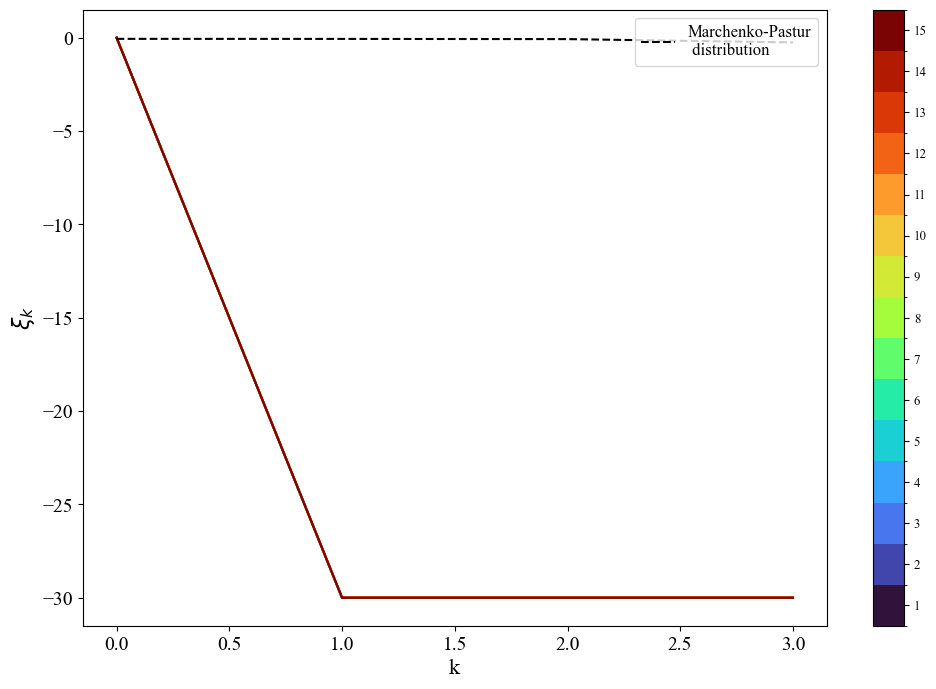

In [373]:
qiskit_descriptor = CircuitDescriptor(
    circuit=tc, params=params, cost_function=None
)

qiskit_entanglement_spectrum = EntanglementSpectrum(  
    qiskit_descriptor, samples=1000
)
pqc_sd,mean_eig = qiskit_entanglement_spectrum.entanglement_spectrum("jsd")
data = np.tile(mean_eig, (15, 1))
fig = qiskit_entanglement_spectrum.plot(data)

E:\My_Anaconda\Anaconda\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


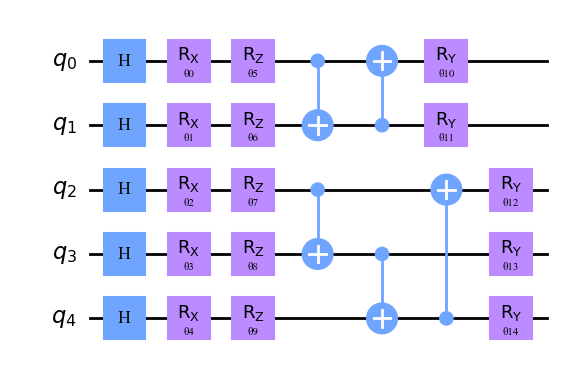

In [374]:
#QFNN
import numpy as np
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.providers.aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

# Import from Qiskit Aer noise module
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import thermal_relaxation_error
from qiskit.quantum_info import state_fidelity

qfnn = qiskit.QuantumCircuit(5)
params = [qiskit.circuit.Parameter(f"θ{i}") for i in range(15)]
# print(params)
for i in range(5):
    qfnn.h(i)
    qfnn.rx(params[i], i)
for i in range(5):
    qfnn.rz(params[i+5], i)
qfnn.cx(0,1)
qfnn.cx(1,0)
qfnn.cx(2,3)
qfnn.cx(3,4)
qfnn.cx(4,2)

for i in range(5):
    qfnn.ry(params[i+10], i)
qfnn.draw('mpl')

In [375]:
# QFNN's Expressibility
qfnn_qiskit_descriptor = CircuitDescriptor(
    circuit=qfnn, params=params, cost_function=None
)

qfnn_qiskit_expressibility = Expressibility(  
    qfnn_qiskit_descriptor, samples=1000
)

qfnn_expr_jsd = qfnn_qiskit_expressibility.expressibility("jsd")
qfnn_expr_jsd

C:\Users\20931\AppData\Local\Temp\ipykernel_22600\2995150012.py:47: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use assign_parameters() instead
  circuit = self.circuit.qiskit_circuit.bind_parameters(param_resolver)
C:\Users\20931\AppData\Local\Temp\ipykernel_22600\2995150012.py:66: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = qiskit.execute(


0.29912502239657496

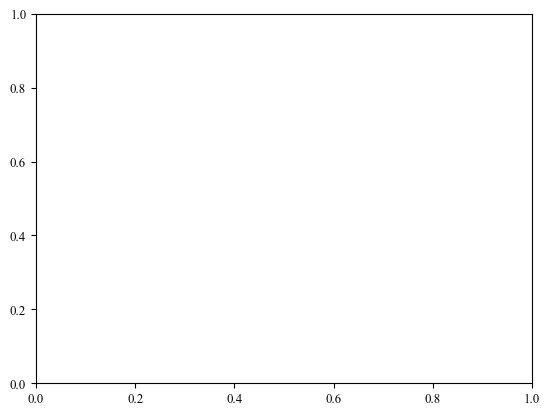

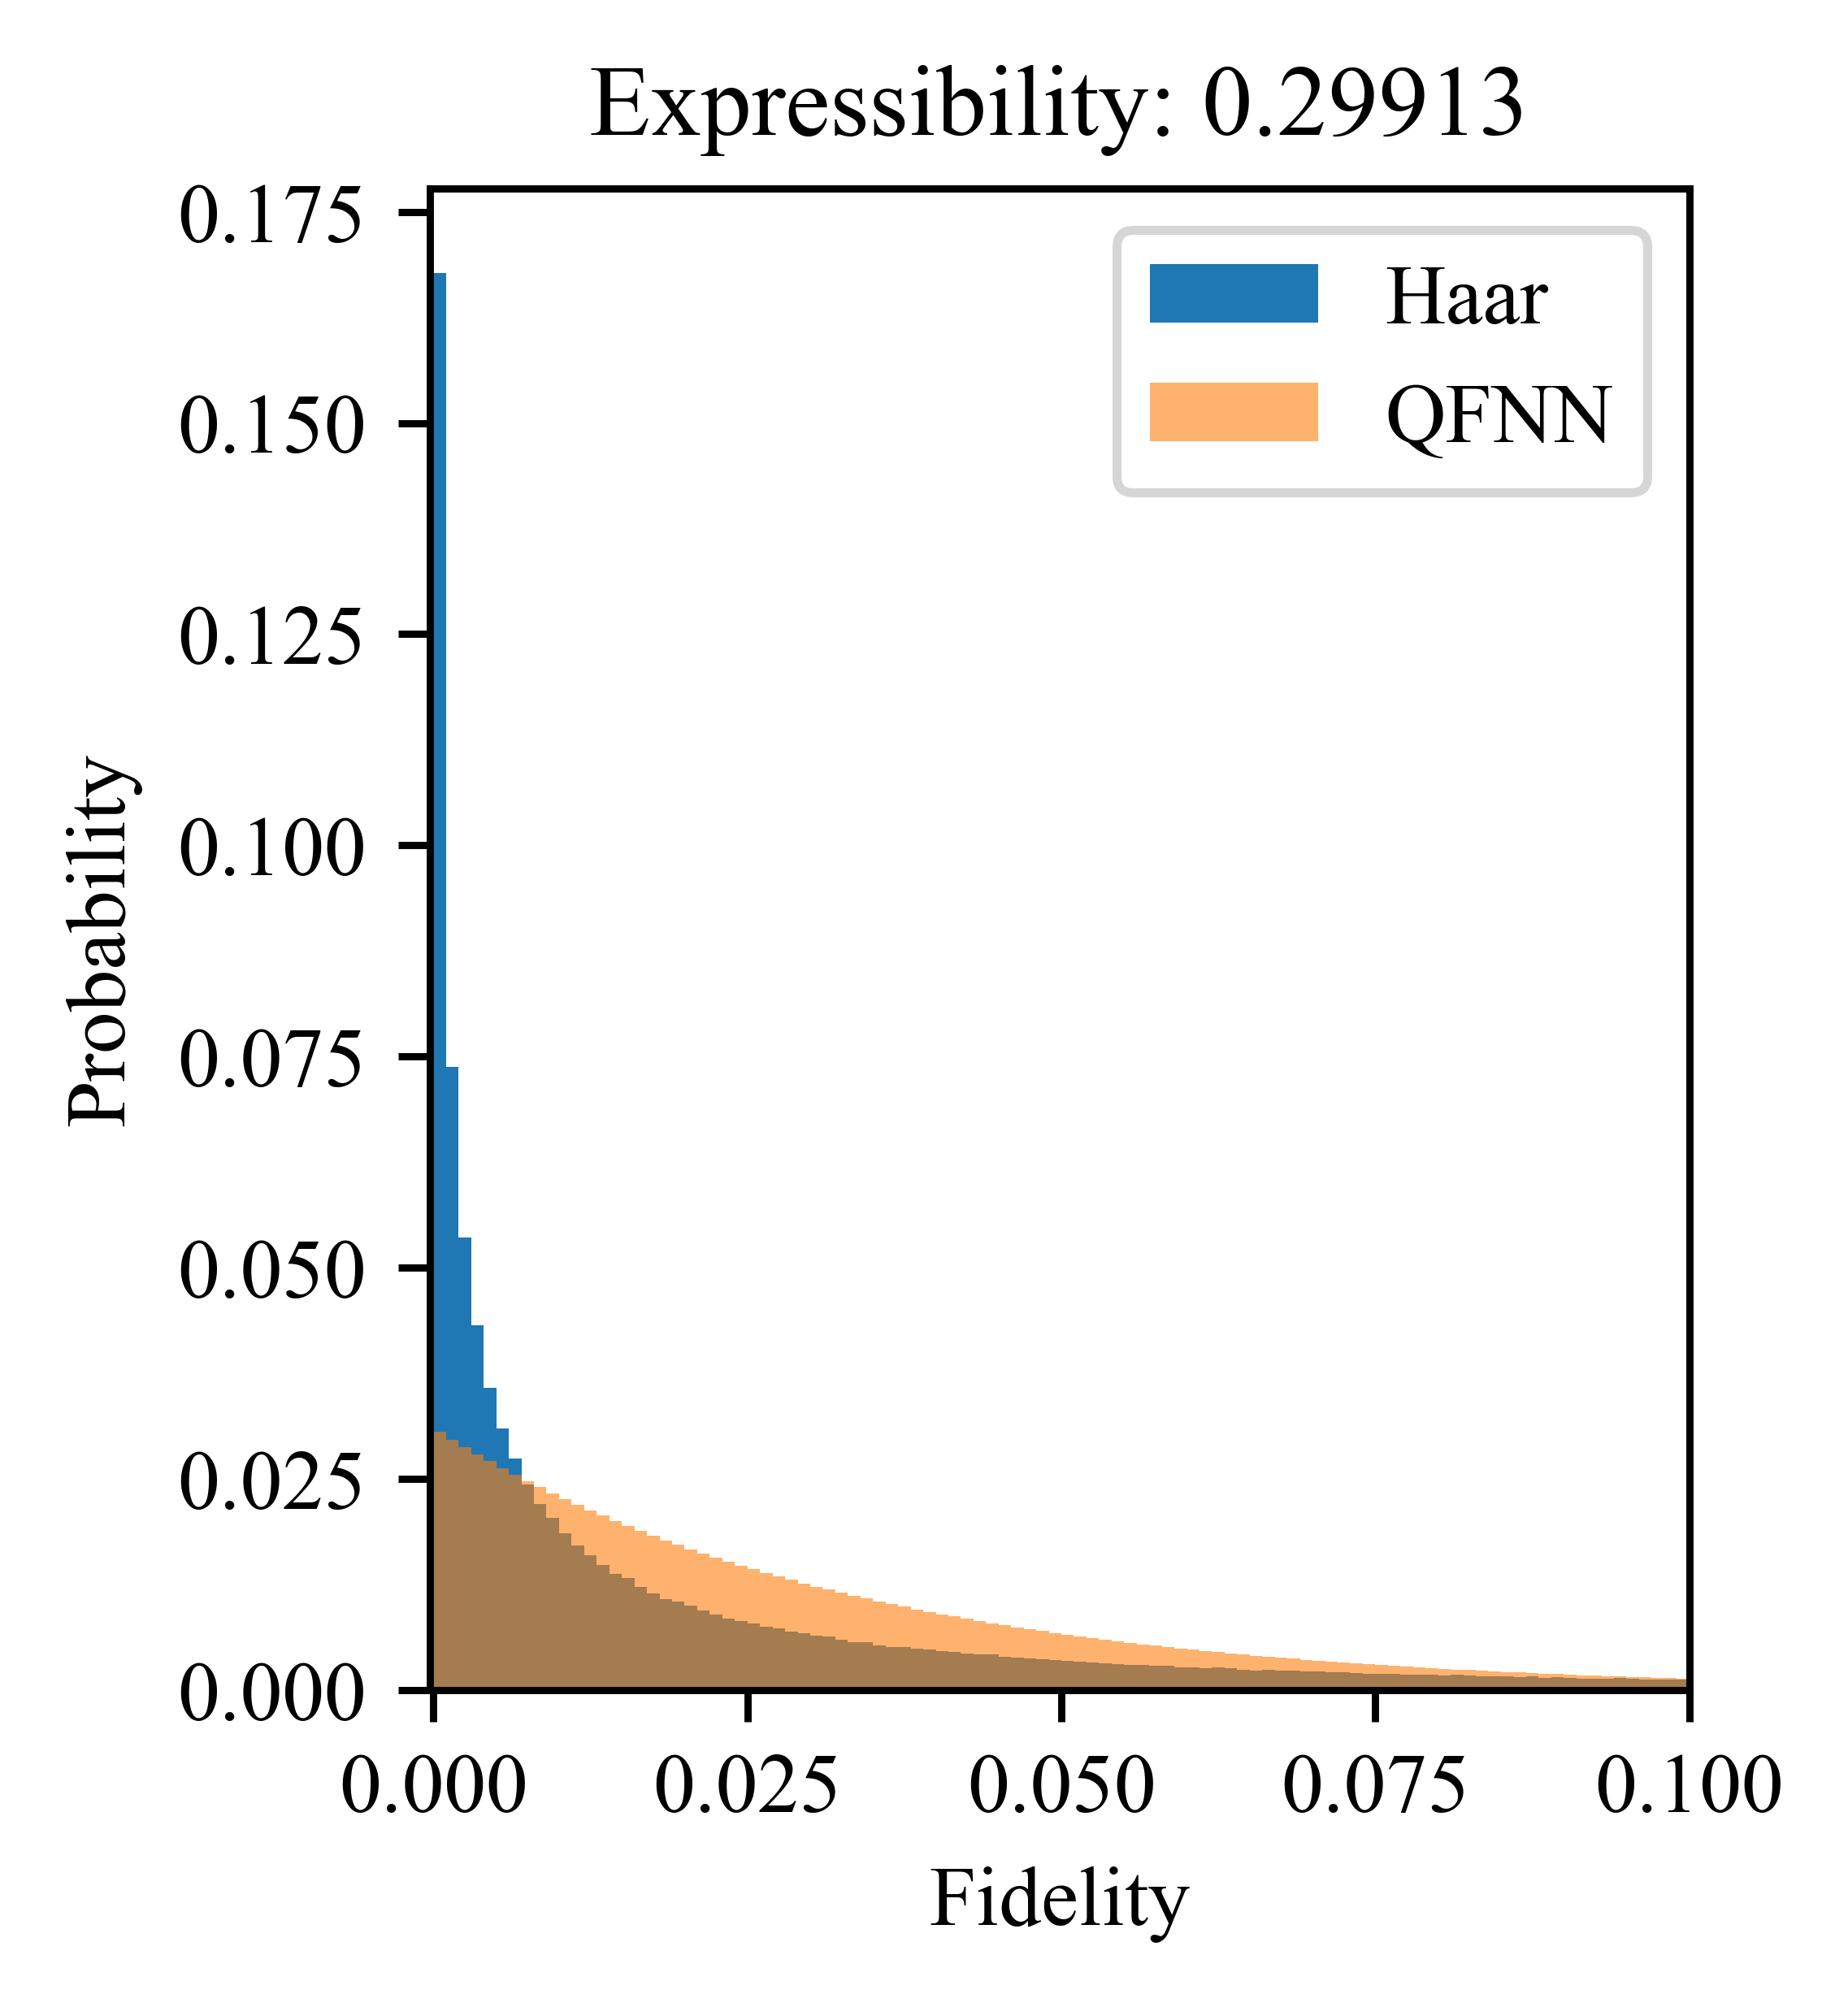

In [376]:
import numpy as np
pqc_prob_qcnn=qfnn_qiskit_expressibility.plot_data[0][:250]
haar_prob=qfnn_qiskit_expressibility.plot_data[1][:250]
bin_edges=qfnn_qiskit_expressibility.plot_data[2][:251]

import matplotlib.pyplot as plt

plt.clf()

plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams['font.size'] = 9.3

plt.grid(False)

plt.figure(figsize=(2.5,3), dpi=800)

expr = qfnn_expr_jsd

bin_middles = (bin_edges[1:] + bin_edges[:-1]) / 2.0
bin_width = bin_edges[1] - bin_edges[0]
plt.bar(bin_middles, haar_prob, width=bin_width, label="Haar")

plt.bar(bin_middles, pqc_prob_qcnn, width=bin_width, label="QFNN", alpha=0.6)

plt.xlim((-0.0003, 0.1 ))
plt.ylim(bottom=0.0, top=max(max(pqc_prob_qcnn), max(haar_prob)) + 0.01)
plt.title(f"Expressibility: {np.round(expr,5)}")
plt.xlabel("Fidelity")
plt.ylabel("Probability")
plt.legend()
plt.show()


E:\My_Anaconda\Anaconda\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


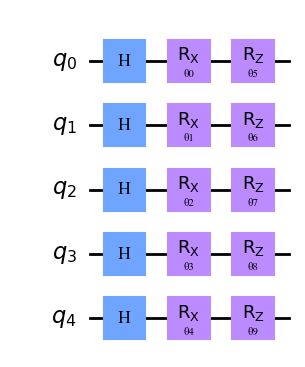

In [377]:
#QFNN without Defuzzifier
qfnn_withoutDefuzzifier = qiskit.QuantumCircuit(5)
qfnn_withoutDefuzzifier_params = [qiskit.circuit.Parameter(f"θ{i}") for i in range(10)]
# print(params)
for i in range(5):
    qfnn_withoutDefuzzifier.h(i)
    qfnn_withoutDefuzzifier.rx(qfnn_withoutDefuzzifier_params[i], i)
for i in range(5):
    qfnn_withoutDefuzzifier.rz(qfnn_withoutDefuzzifier_params[i+5], i)

qfnn_withoutDefuzzifier.draw('mpl')

In [379]:
# QFNN without Defuzzifier's Expressibility
qfnn_withoutDefuzzifier_qiskit_descriptor = CircuitDescriptor(
    circuit=qfnn_withoutDefuzzifier, params=qfnn_withoutDefuzzifier_params, cost_function=None
)

qfnn_withoutDefuzzifier_qiskit_expressibility = Expressibility(  
    qfnn_withoutDefuzzifier_qiskit_descriptor, samples=1000
)

qfnn_withoutDefuzzifier_expr_jsd = qfnn_withoutDefuzzifier_qiskit_expressibility.expressibility("jsd")
qfnn_withoutDefuzzifier_expr_jsd

C:\Users\20931\AppData\Local\Temp\ipykernel_22600\2995150012.py:47: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use assign_parameters() instead
  circuit = self.circuit.qiskit_circuit.bind_parameters(param_resolver)
C:\Users\20931\AppData\Local\Temp\ipykernel_22600\2995150012.py:66: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = qiskit.execute(


0.5194005137676694

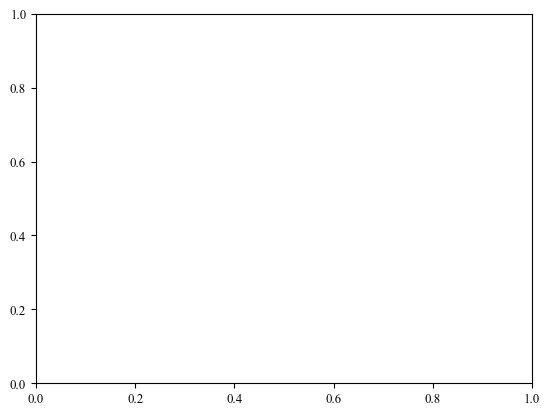

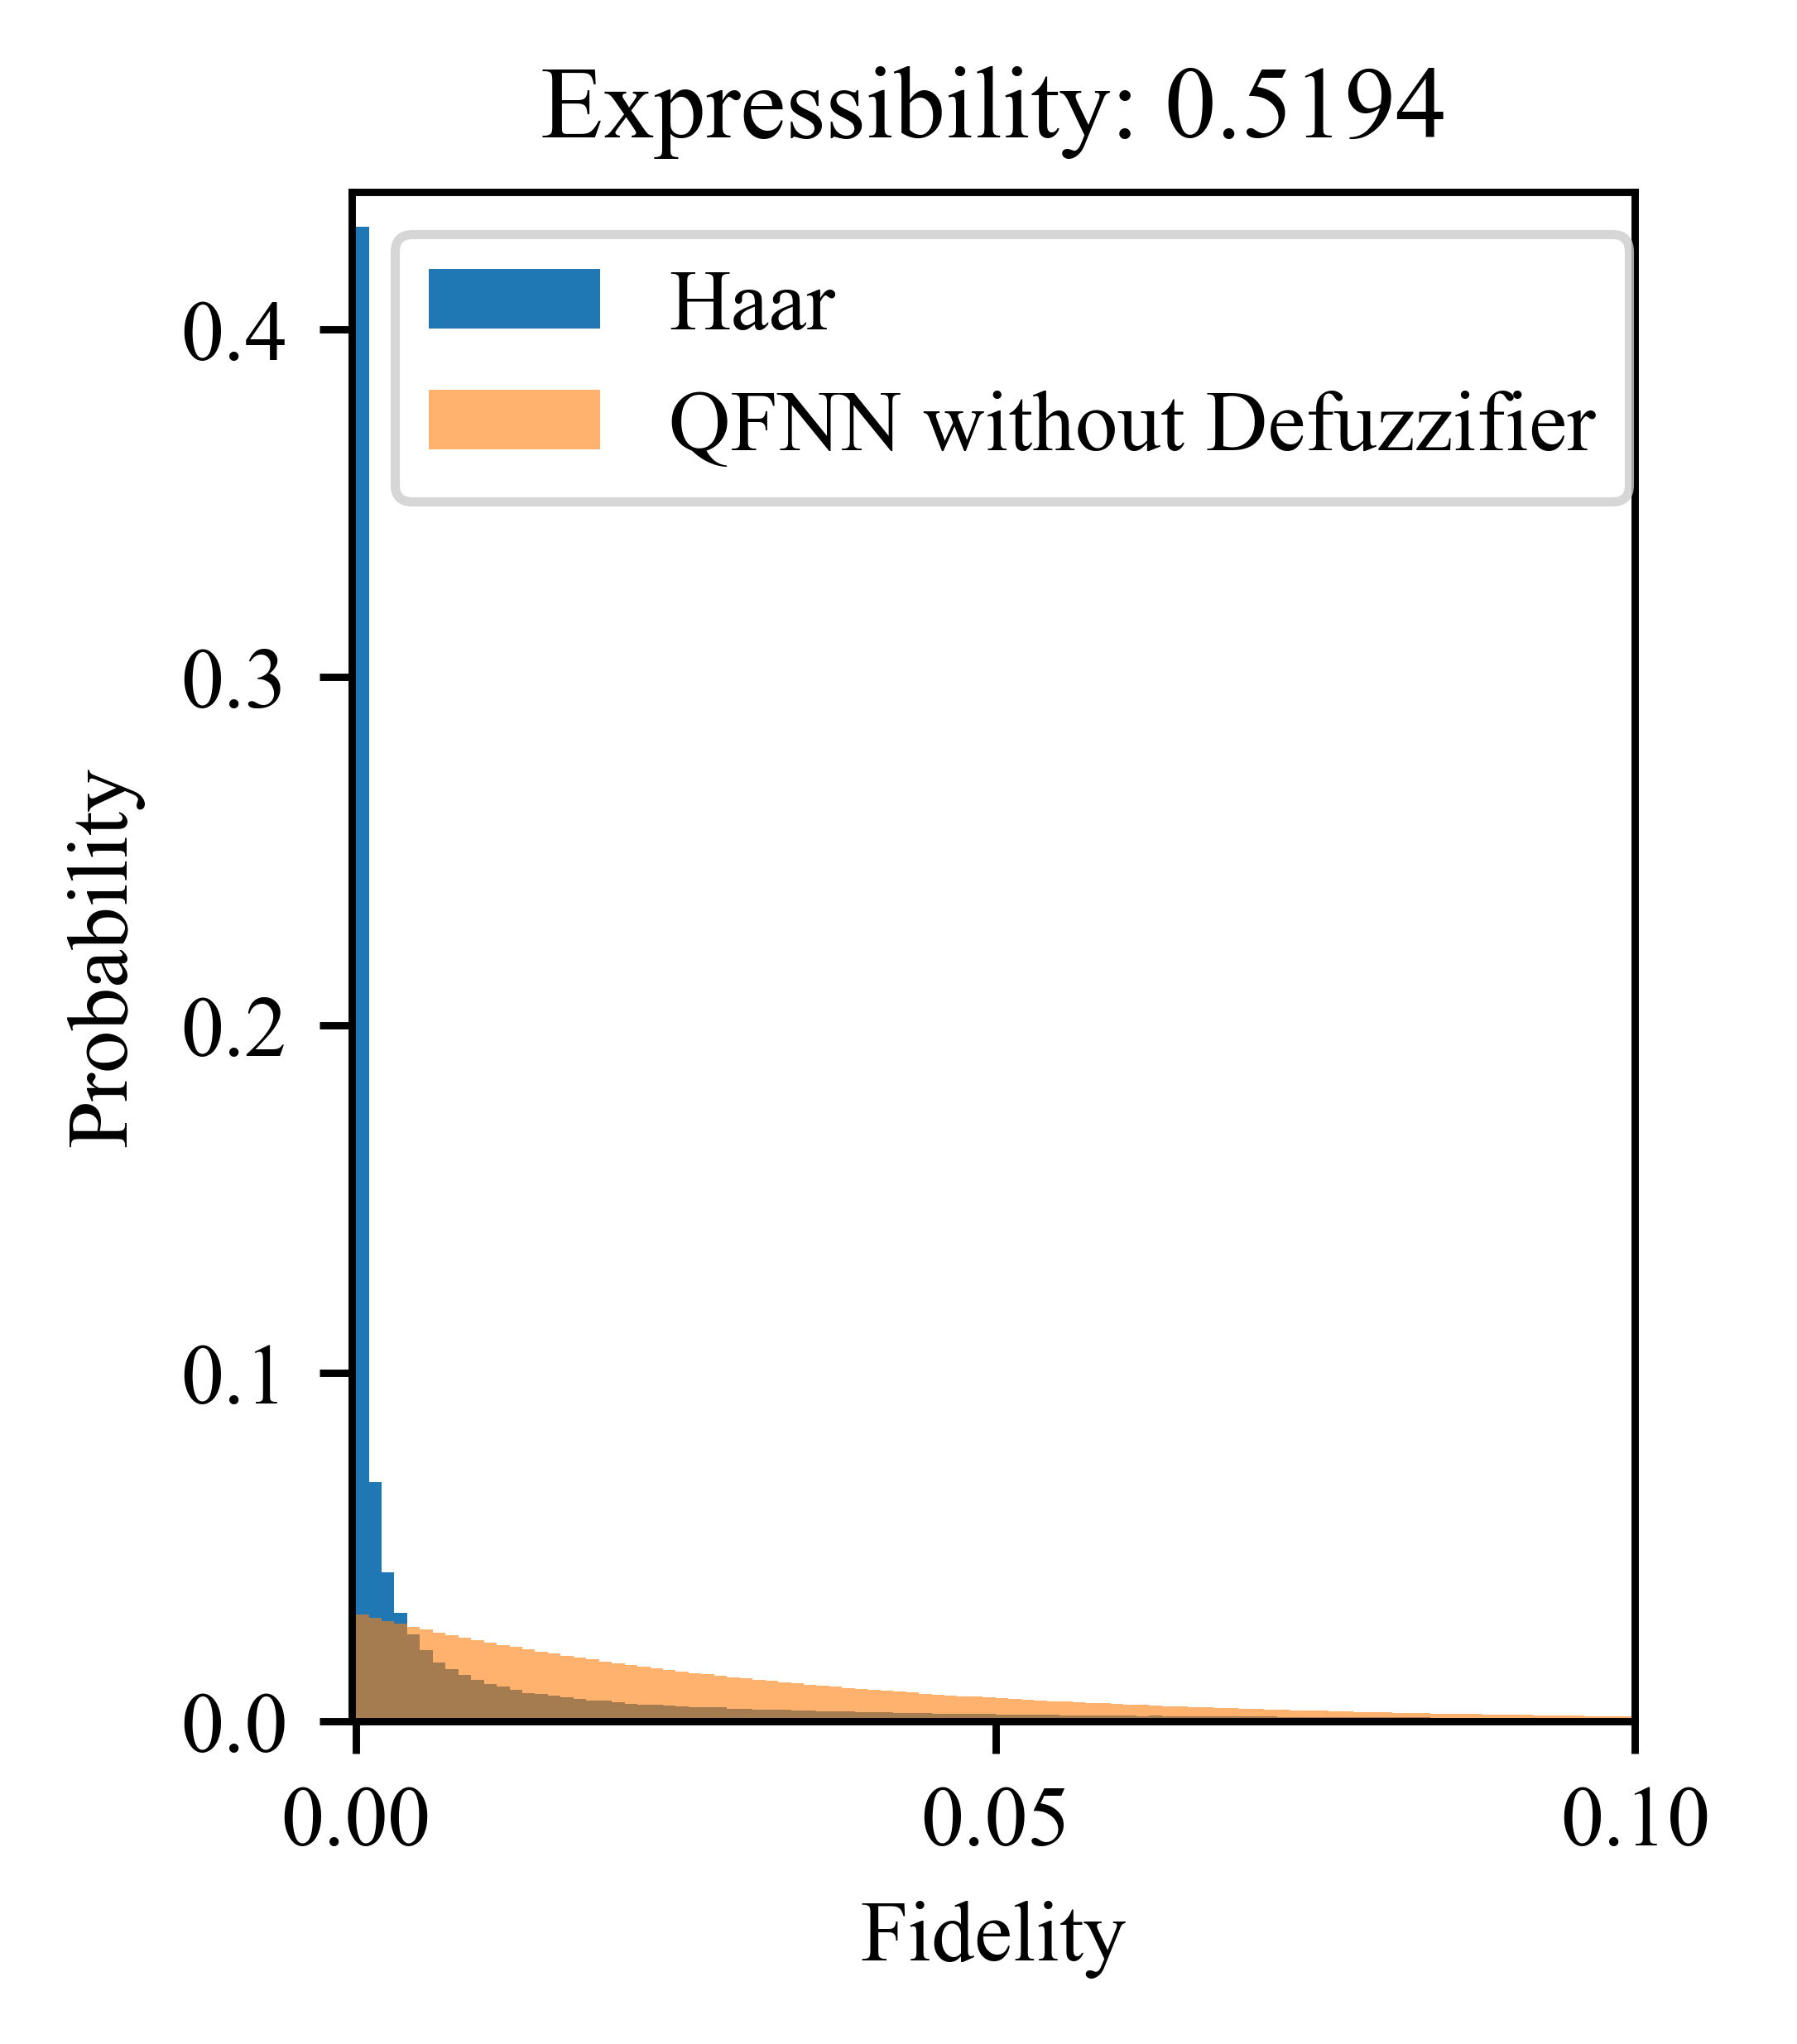

In [380]:
import numpy as np
pqc_prob_qcnn=qfnn_withoutDefuzzifier_qiskit_expressibility.plot_data[0][:250]
haar_prob=qfnn_withoutDefuzzifier_qiskit_expressibility.plot_data[1][:250]
bin_edges=qfnn_withoutDefuzzifier_qiskit_expressibility.plot_data[2][:251]

import matplotlib.pyplot as plt

plt.clf()

plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams['font.size'] = 9.3

plt.grid(False)

plt.figure(figsize=(2.5,3), dpi=800)

expr = qfnn_withoutDefuzzifier_expr_jsd

bin_middles = (bin_edges[1:] + bin_edges[:-1]) / 2.0
bin_width = bin_edges[1] - bin_edges[0]
plt.bar(bin_middles, haar_prob, width=bin_width, label="Haar")

plt.bar(bin_middles, pqc_prob_qcnn, width=bin_width, label="QFNN without Defuzzifier", alpha=0.6)

plt.xlim((-0.0003, 0.1 ))
plt.ylim(bottom=0.0, top=max(max(pqc_prob_qcnn), max(haar_prob)) + 0.01)
plt.title(f"Expressibility: {np.round(expr,5)}")
plt.xlabel("Fidelity")
plt.ylabel("Probability")
plt.legend()
plt.show()


E:\My_Anaconda\Anaconda\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


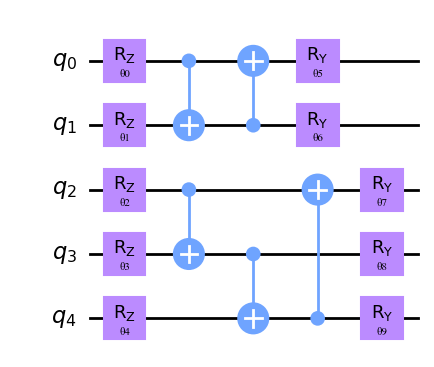

In [381]:
#QFNN without Fuzzifier
qfnn_withoutFuzzifier = qiskit.QuantumCircuit(5)
qfnn_withoutFuzzifier_params = [qiskit.circuit.Parameter(f"θ{i}") for i in range(10)]
# print(params)

for i in range(5):
    qfnn_withoutFuzzifier.rz(qfnn_withoutFuzzifier_params[i], i)
    
qfnn_withoutFuzzifier.cx(0,1)
qfnn_withoutFuzzifier.cx(1,0)
qfnn_withoutFuzzifier.cx(2,3)
qfnn_withoutFuzzifier.cx(3,4)
qfnn_withoutFuzzifier.cx(4,2)

for i in range(5):
    qfnn_withoutFuzzifier.ry(qfnn_withoutFuzzifier_params[i+5], i)

qfnn_withoutFuzzifier.draw('mpl')

In [382]:
# QFNN without Fuzzifier's Expressibility
qfnn_withoutFuzzifier_qiskit_descriptor = CircuitDescriptor(
    circuit=qfnn_withoutFuzzifier, params=qfnn_withoutFuzzifier_params, cost_function=None
)

qfnn_withoutFuzzifier_qiskit_expressibility = Expressibility(  
    qfnn_withoutFuzzifier_qiskit_descriptor, samples=1000
)

qfnn_withoutFuzzifier_expr_jsd = qfnn_withoutFuzzifier_qiskit_expressibility.expressibility("jsd")
qfnn_withoutFuzzifier_expr_jsd

C:\Users\20931\AppData\Local\Temp\ipykernel_22600\2995150012.py:47: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use assign_parameters() instead
  circuit = self.circuit.qiskit_circuit.bind_parameters(param_resolver)
C:\Users\20931\AppData\Local\Temp\ipykernel_22600\2995150012.py:66: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = qiskit.execute(


0.5193512891705636

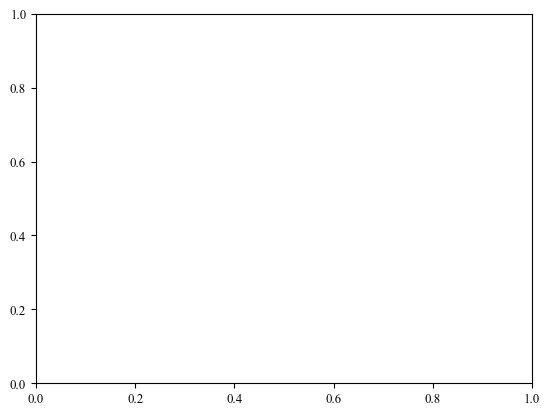

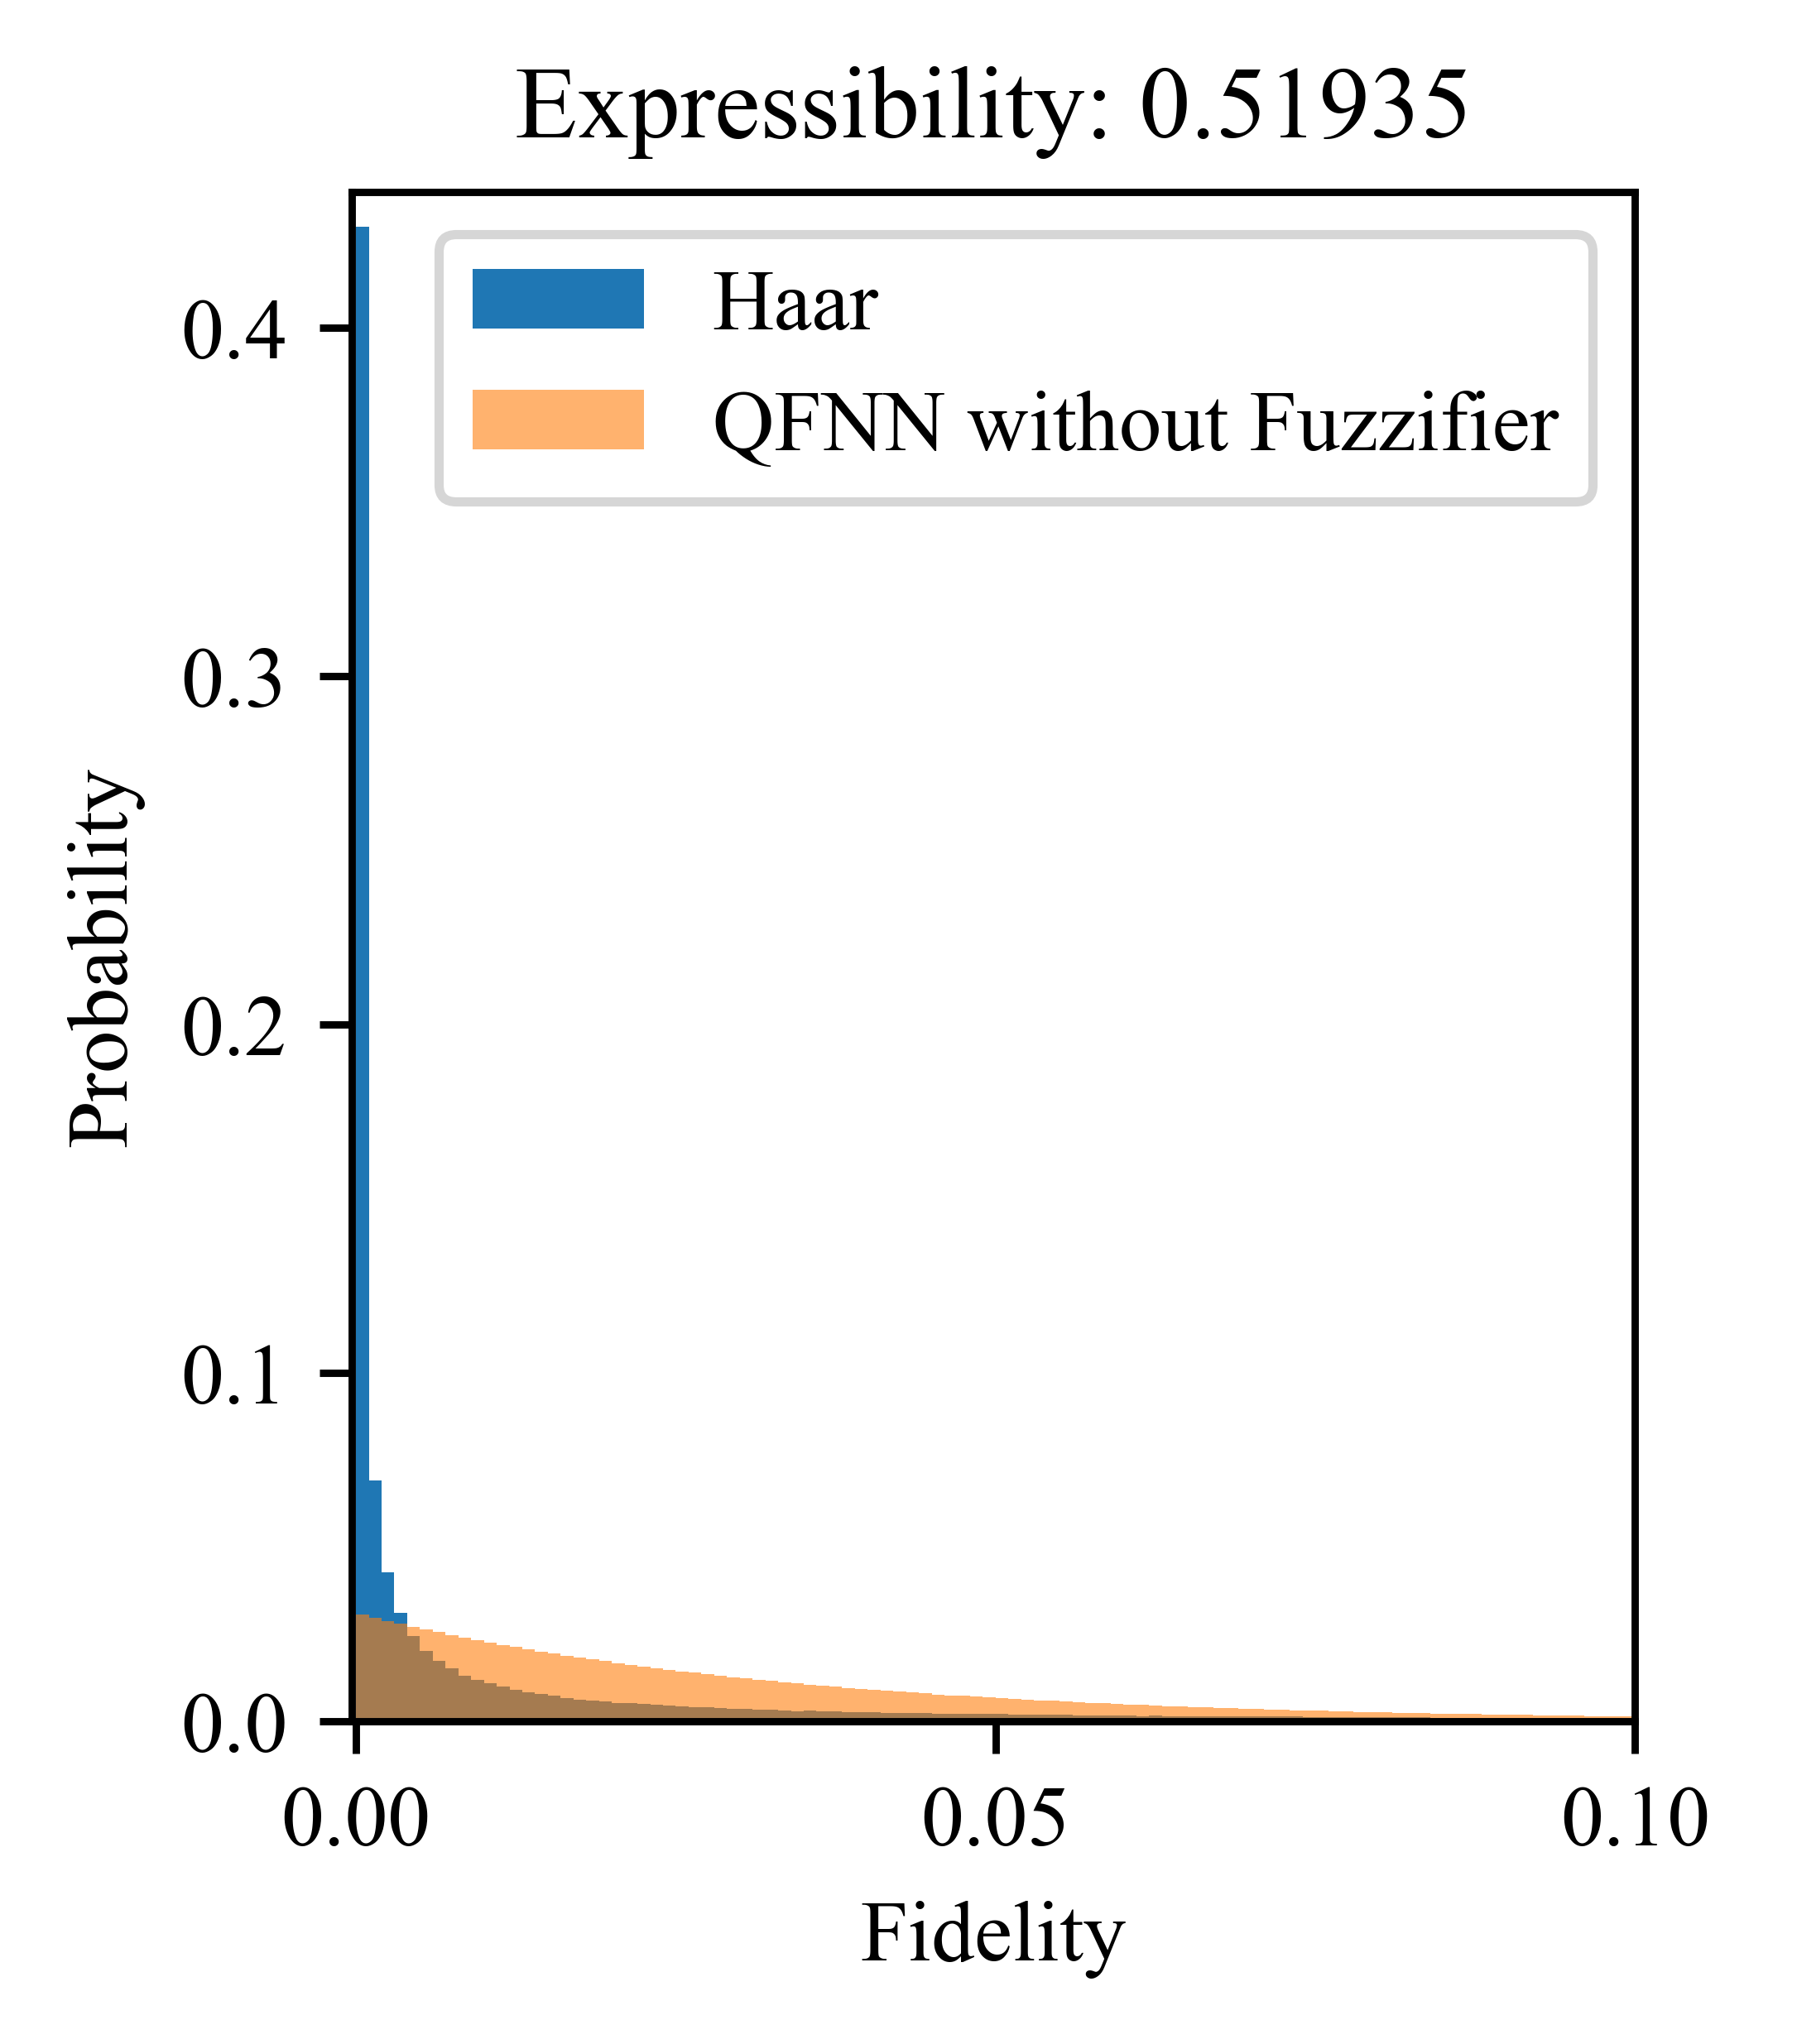

In [383]:
import numpy as np
pqc_prob_qcnn=qfnn_withoutFuzzifier_qiskit_expressibility.plot_data[0][:250]
haar_prob=qfnn_withoutFuzzifier_qiskit_expressibility.plot_data[1][:250]
bin_edges=qfnn_withoutFuzzifier_qiskit_expressibility.plot_data[2][:251]

import matplotlib.pyplot as plt

plt.clf()

plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams['font.size'] = 9.3

plt.grid(False)

plt.figure(figsize=(2.5,3), dpi=800)

expr = qfnn_withoutFuzzifier_expr_jsd

bin_middles = (bin_edges[1:] + bin_edges[:-1]) / 2.0
bin_width = bin_edges[1] - bin_edges[0]
plt.bar(bin_middles, haar_prob, width=bin_width, label="Haar")

plt.bar(bin_middles, pqc_prob_qcnn, width=bin_width, label="QFNN without Fuzzifier", alpha=0.6)

plt.xlim((-0.0003, 0.1 ))
plt.ylim(bottom=0.0, top=max(max(pqc_prob_qcnn), max(haar_prob)) + 0.01)
plt.title(f"Expressibility: {np.round(expr,5)}")
plt.xlabel("Fidelity")
plt.ylabel("Probability")
plt.legend()
plt.show()


In [462]:
qfnn_ent = qiskit.QuantumCircuit(5)
qfnn_ent_params = [qiskit.circuit.Parameter(f"θ{i}") for i in range(15)]
# print(qfnn_ent)
for i in range(5):
    qfnn_ent.h(i)
    qfnn_ent.rx(qfnn_ent_params[i], i)
for i in range(5):
    qfnn_ent.rz(qfnn_ent_params[i+5], i)
qfnn_ent.cx(0,1)
qfnn_ent.cx(1,0)
qfnn_ent.cx(2,3)
qfnn_ent.cx(3,4)
qfnn_ent.cx(4,2)

for i in range(5):
    qfnn_ent.ry(qfnn_ent_params[i+10], i)

qfnn_ent_qiskit_descriptor = CircuitDescriptor(
    circuit=qfnn_ent, params=qfnn_ent_params, cost_function=None
)
qqfnn_qiskit_entanglement_capability = (
    EntanglementCapability(
        qfnn_ent_qiskit_descriptor, samples=1000
    )
)
qfnn_entanglement_mw = qqfnn_qiskit_entanglement_capability.entanglement_capability("meyer-wallach")
qfnn_entanglement_mw

C:\Users\20931\AppData\Local\Temp\ipykernel_22600\2995150012.py:47: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use assign_parameters() instead
  circuit = self.circuit.qiskit_circuit.bind_parameters(param_resolver)
C:\Users\20931\AppData\Local\Temp\ipykernel_22600\2995150012.py:66: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = qiskit.execute(


0.6527743995631885

In [464]:
qqfnn_withoutFuzzifier_qiskit_entanglement_capability = (
    EntanglementCapability(
        qfnn_withoutFuzzifier_qiskit_descriptor, samples=1000
    )
)
qqfnn_withoutFuzzifier_entanglement_mw = qqfnn_withoutFuzzifier_qiskit_entanglement_capability.entanglement_capability("meyer-wallach")
qqfnn_withoutFuzzifier_entanglement_mw

C:\Users\20931\AppData\Local\Temp\ipykernel_22600\2995150012.py:47: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use assign_parameters() instead
  circuit = self.circuit.qiskit_circuit.bind_parameters(param_resolver)
C:\Users\20931\AppData\Local\Temp\ipykernel_22600\2995150012.py:66: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = qiskit.execute(


4.007905118896815e-17

In [466]:
qqfnn_withoutDefuzzifier_qiskit_entanglement_capability = (
    EntanglementCapability(
        qfnn_withoutDefuzzifier_qiskit_descriptor, samples=1000
    )
)
qqfnn_withoutDefuzzifier_entanglement_mw = qqfnn_withoutDefuzzifier_qiskit_entanglement_capability.entanglement_capability("meyer-wallach")
qqfnn_withoutDefuzzifier_entanglement_mw

C:\Users\20931\AppData\Local\Temp\ipykernel_22600\2995150012.py:47: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use assign_parameters() instead
  circuit = self.circuit.qiskit_circuit.bind_parameters(param_resolver)
C:\Users\20931\AppData\Local\Temp\ipykernel_22600\2995150012.py:66: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = qiskit.execute(


-2.7775559630072167e-15

#Entanglement

In [483]:
# 定义电路结构
def ansatz(params , cparams=None):
    layers,num_qubits,depth = params.shape
    ansatz = qiskit.QuantumCircuit(num_qubits)
    for idx in range(layers):
        if idx:
            ansatz.barrier()
            
        """
        for ind in range(num_qubits):
            ansatz.h(ind)
            ansatz.rx(params[idx][ind][0], ind)
            ansatz.rz(params[idx][ind][1], ind) 
        ansatz.cx(0,1)
        ansatz.cx(1,0)
        ansatz.cx(2,3)
        ansatz.cx(3,4)
        ansatz.cx(4,2)   #QFNN,按电路结构进行更改,此时下个cell中需要修改3也需要改为2(去除模糊器)或1（去除去模糊器）[idx][ind][1]，1按电路中门的次序排列
                
        for ind in range(num_qubits):
            ansatz.ry(params[idx][ind][2], ind)         
        
        """
        for ind in range(num_qubits):
            ansatz.h(ind)
            ansatz.rx(params[idx][ind][0], ind)
#             ansatz.rz(params[idx][ind][0], ind) 
#         ansatz.cx(0,1)
#         ansatz.cx(1,0)
#         ansatz.cx(2,3)
#         ansatz.cx(3,4)
#         ansatz.cx(4,2)   
                
#         for ind in range(num_qubits):
#             ansatz.ry(params[idx][ind][1], ind) 
#     if layers == 12:
#         ansatz.draw("mpl")
    return ansatz


1 

C:\Users\20931\AppData\Local\Temp\ipykernel_22600\2995150012.py:47: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use assign_parameters() instead
  circuit = self.circuit.qiskit_circuit.bind_parameters(param_resolver)
C:\Users\20931\AppData\Local\Temp\ipykernel_22600\2995150012.py:66: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = qiskit.execute(
E:\My_Anaconda\Anaconda\Lib\site-packages\scipy\linalg\_matfuncs_inv_ssq.py:836: LogmNearlySingularWarning: The logm input matrix may be nearly singular.
  warnings.warn(near_singularity_msg, LogmNearl

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 

C:\Users\20931\AppData\Local\Temp\ipykernel_22600\2988967834.py:249: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(smap, ticks=ticks)


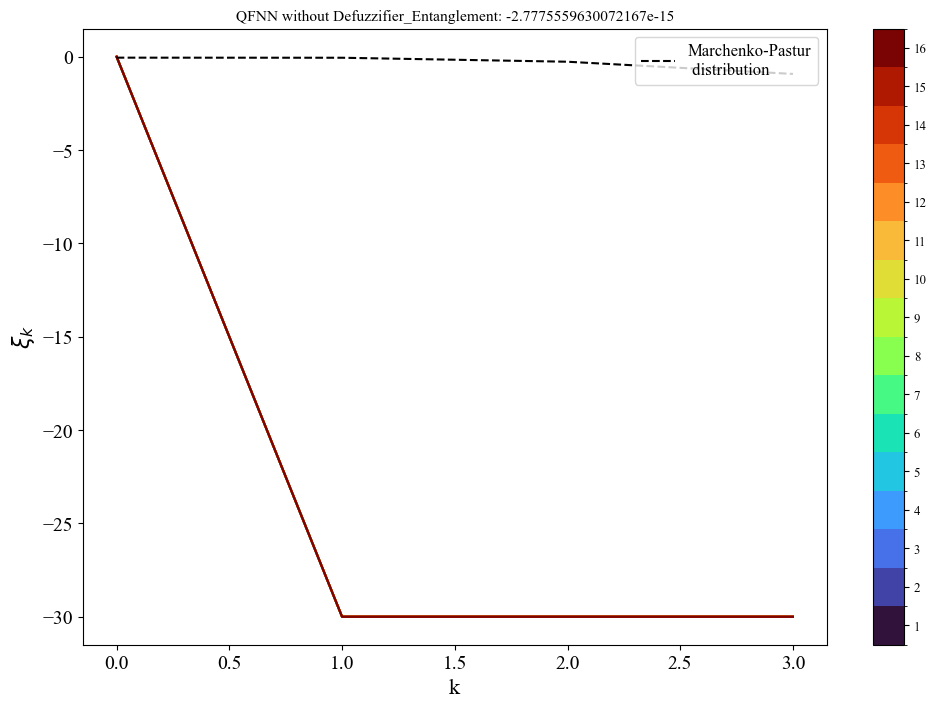

In [484]:
data = []
results = []
num_qubits = 5
for idx in range(1, 17):
    print(idx , end=' ')
    params = np.array ([qiskit.circuit.Parameter (fr"$\theta_{idx}$")
                        for idx in range(idx*num_qubits*1)])
    qiskit_descriptor = CircuitDescriptor (
        circuit=ansatz(np.array(params).reshape((idx,num_qubits ,1))) ,
        
        params=params, cost_function =None
    )
    
    qiskit_entanglement_spectrum = EntanglementSpectrum(
        qiskit_descriptor, samples =100
    )
    pqc_esd, mean_eig = qiskit_entanglement_spectrum.entanglement_spectrum ("jsd")
    results.append(pqc_esd)
    data.append(mean_eig)
data = np.array(data)
fig = qiskit_entanglement_spectrum.plot(data,ent_value=qqfnn_withoutDefuzzifier_entanglement_mw,type_name="QFNN without Defuzzifier_")#_手动输入